<a href="https://colab.research.google.com/github/for-professional-work-j/DecisionTrees_for_CreditRisk/blob/main/Decision_Trees_for_Credit_Risk_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Trees for Credit Risk Assessment

## Introduction

This aim of this notebook is intended to deepen my understanding of Decision Trees by developing a decision tree based machine learning model for a financial use case.

I was inspired to explore Gradient Boosting further after reading the approach presented in Gradient Boosting for Interpretable Risk Assessment in Finance (Kori & Hugar, 2021). I believe that this paper highlighted the importance of bridging the gap between predictive accuracy and interpretability in financial risk models.

I've attached a link to the paper  in case you're interested in reading it [here](https://www.researchgate.net/profile/Anita-Kori/publication/386052952_Gradient_Boosting_for_Interpretable_Risk_Assessment_in_Finance_A_Study_on_Feature_Importance_and_Model_Explainability/links/674173dd7ca4cb2842a3ef7a/Gradient-Boosting-for-Interpretable-Risk-Assessment-in-Finance-A-Study-on-Feature-Importance-and-Model-Explainability.pdf).

The GitHub ["Machine learning algorithms for predicting default of Credit Card clients" by MatteoM95](https://github.com/MatteoM95/Default-of-Credit-Card-Clients-Dataset-Analisys?tab=readme-ov-file#machine-learning-algorithms-for-predicting-default-of-credit-card-clients-) also served as a basis for me to learn and structure my approach in this notebook - especially with regards to the Data Expoloration stage. I followed this project because I aspire to explain concepts and present analysis as clearly and effectively as MatteoM95 does.

While currently working through Introduction to Machine Learning with Python by Andreas C. Müller and Sarah Guido, I also wanted to reinforce my understanding of decision tree–based models by comparing the performance and interpretability of Gradient Boosting and Random Forest algorithms in a practical context.

Therefore, this notebook will aim to compare Random Forest (RF) and Gradient Boosting (GB) models to predict the likelihood of default on credit card payments. The goal is not only to evaluate which model performs better in terms of accuracy and F1-score, but also to examine their interpretability, generalization behavior, and how each model responds to different data treatments such as SMOTE and PCA.

Any constructive criticism, input on my methods or what can be improved is definitely welcomed as I start my foray into the world of machine learning.

## Data Exploration

### Data Analysis

The dataset used in this notebook and is called the [Default of Credit Card Clients Dataset](https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset), which I found through Kaggle.  It consits of 30,000 rows of data with 25 columns that contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

The 25 columns can be broken up into the following categories for easier comprehension.

The first category pertains information **regarding the client** itself:

* `ID`: ID of each client
* `LIMIT_BAL`: Amount of given credit in NT dollars (includes individual and family/supplementary credit
* `SEX`: Gender (1=male, 2=female)
* `EDUCATION`: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* `MARRIAGE`: Marital status (1=married, 2=single, 3=others)
* `AGE`: Age in years

The second category contains information **regarding the delays of past payments** :

* `PAY_0`: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
* `PAY_2`: Repayment status in August, 2005 (scale same as above)
* `PAY_3`: Repayment status in July, 2005 (scale same as above)
* `PAY_4`: Repayment status in June, 2005 (scale same as above)
* `PAY_5`: Repayment status in May, 2005 (scale same as above)
* `PAY_6`: Repayment status in April, 2005 (scale same as above)

The third category contains information **regarding the amount in the bill statement** :

* `BILL_AMT1`: Amount of bill statement in September, 2005 (NT dollar)
* `BILL_AMT2`: Amount of bill statement in August, 2005 (NT dollar)
* `BILL_AMT3`: Amount of bill statement in July, 2005 (NT dollar)
* `BILL_AMT4`: Amount of bill statement in June, 2005 (NT dollar)
* `BILL_AMT5`: Amount of bill statement in May, 2005 (NT dollar)
* `BILL_AMT6`: Amount of bill statement in April, 2005 (NT dollar)

The fourth category contains information **regarding the amount of previous payment** :
* `PAY_AMT1`: Amount of previous payment in September, 2005 (NT dollar)
* `PAY_AMT2`: Amount of previous payment in August, 2005 (NT dollar)
* `PAY_AMT3`: Amount of previous payment in July, 2005 (NT dollar)
* `PAY_AMT4`: Amount of previous payment in June, 2005 (NT dollar)
* `PAY_AMT5`: Amount of previous payment in May, 2005 (NT dollar)
* `PAY_AMT6`: Amount of previous payment in April, 2005 (NT dollar)

The fifth category is the **target variable** (what we want to predict) :
* `default.payment.next.month`: Default payment (1=yes, 0=no)

---

The aim of the machine learning models in this notebook will therefore be predicting the `default.payment.next.month` target variable which makes it a binary classification problem.


First, we will import the dataset from Kaggle and conduct an initial exploration of the data. Gaining a thorough understanding of the dataset — including the nature of each feature, the relationships between variables, and any potential data quality issues — is a critical first step. This foundational knowledge will guide our feature engineering, model selection, and evaluation strategies throughout the project. Careful exploration ensures that we can make informed decisions and build a more robust and interpretable machine learning model.

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/default-of-credit-card-clients-dataset")

print("Path to dataset files:", path)

100%|██████████| 0.98M/0.98M [00:00<00:00, 33.7MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/uciml/default-of-credit-card-clients-dataset/versions/1


In [ ]:
import os

files = os.listdir(path)
print(files)

['UCI_Credit_Card.csv']


In [ ]:
import pandas as pd

df = pd.read_csv(os.path.join(path, "UCI_Credit_Card.csv"))
# Printing out the first 5 rows of the dataframe to see a sample of the data
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [ ]:
df.isna().sum()

,0
ID,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_0,0
PAY_2,0
PAY_3,0
PAY_4,0


In [ ]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


Taking a closer look at the dataframe, we start to notice a few things.

1. There are no null or empty data rows.
2. The `EDUCATION` and `MARRIAGE` columns seem to be inconsistent with the Kaggle dataset description provided, and there are some incorrect categories.
3. Similarly the `PAY_x` columns start from -2 which is inconsistent with the dataset description.

We will address all these issues in the next section.


### Data Cleaning

As previously mentioned, there were some issues we spotted within the dataset and in this section we will start to address those issues.

For (2), some of the categorical columns contain values that do not match the documented categories, so we have 2 choices to deal with them.

1. Group or map invalid categories (e.g. map EDUCATION=0,5,6 to EDUCATION=4,)
2. Drop / delete those rows

Ideally it is best to always retain as much data from the original dataset as possible, however we also need to take into account the % of these undocumented data. If the incorrect data is relatively small, we can decide to delete those rows. If the incorrect data presents a substantial amount from our dataset, we will need to fix them.

Let's first take a look at the proportion of the undocumented data in the `EDUCATION` and `MARRIAGE` columns.

In [ ]:
# Proportion of values in EDUCATION column
df['EDUCATION'].value_counts().sort_index()

,count
EDUCATION,
0,14
1,10585
2,14030
3,4917
4,123
5,280
6,51


In [ ]:
# Proportion of values in MARRIAGE column
df['MARRIAGE'].value_counts().sort_index()

,count
MARRIAGE,
0,54
1,13659
2,15964
3,323


Since the incorrect data amounts to only a small percentage of the dataset we can decide to delete those rows.

In [ ]:
# Delete the incorrect rows
df = df.drop(df[df['MARRIAGE']==0].index)
df = df.drop(df[df['EDUCATION']==0].index)
df = df.drop(df[df['EDUCATION']==5].index)
df = df.drop(df[df['EDUCATION']==6].index)

# Print out the row size after deleting the incorrect data
print(f"Rows size:\t{df.shape[0]}")

Rows size:	29601


In [ ]:
# In case we want to fix the incorrect data by mapping, we can uncomment the following code
# # Map invalid EDUCATION values to 4 (others)
# df['EDUCATION'] = df['EDUCATION'].replace({0: 4, 5: 4, 6: 4})
# # Map invalid MARRIAGE values to 3 (others)
# df['MARRIAGE'] = df['MARRIAGE'].replace({0: 3})

For (3), we observed that there are -2 (incorrect) values for PAY_1 till PAY_6, so we'll have to change that to -1 (correct) value.

In [ ]:
pay_features = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for p in pay_features:
    df.loc[df[p]<0, p] = -1

### Further Data Exploration

After cleaning and fixing the data, we can start with further exploration.

Next, let's consider the following things:
1. What is the proportion of the target variable (default.payment.next.month) ?
2. What does the data distribution look like for continuous variables (LIMIT_BAL, AGE) ?
3. What does the data distribution look like for non-continous variables (SEX, EDUCATION, MARRIAGE) ?
4. Are there any relationships that can be gleamed from the columns in relation to the target variable? Put in another way, could we see any relationships between age group and how likely they are to default for example? Could this perhaps be an indication of how important the column would be for the future model?
5. Are there any highly correlated variables? Do we need to use some feature engineering or dimensionality reduction techniques to address this?

In [ ]:
# Raw counts of default.payment.next.month
counts = df['default.payment.next.month'].value_counts()
# Percentages of default.payment.next.month
percentages = df['default.payment.next.month'].value_counts(normalize=True) * 100

print(counts)
print(percentages)

default.payment.next.month
0    22996
1     6605
Name: count, dtype: int64
default.payment.next.month
0    77.686565
1    22.313435
Name: proportion, dtype: float64


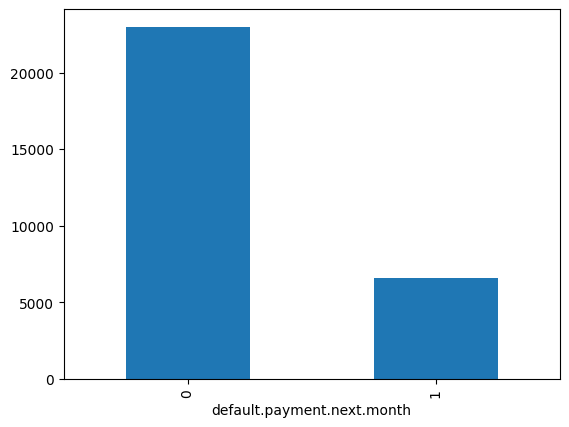

In [ ]:
import matplotlib.pyplot as plt

df['default.payment.next.month'].value_counts().plot(kind='bar')
plt.show()

It seems that the target variable is quite imbalanced, so this is something good to note for when we build the model. We can incorporate additional technqiues to help with the imbalanced classes such as :     
1. Applying stratified sampling when splitting the data
2. Applying weights to the smaller class. In random forest this could be using the class_weight parameter, and in XGBoost this would be the scale_pos_weight parameter.
3. Applying oversampling/undersampling. We can oversample the minority class using SMOTE or undersample the majority class. However, using this method it is possible that we increase the chance of overfitting so that is something to take note of.

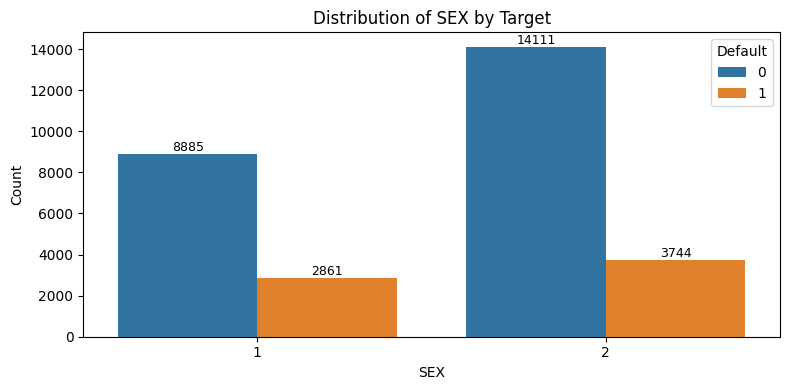

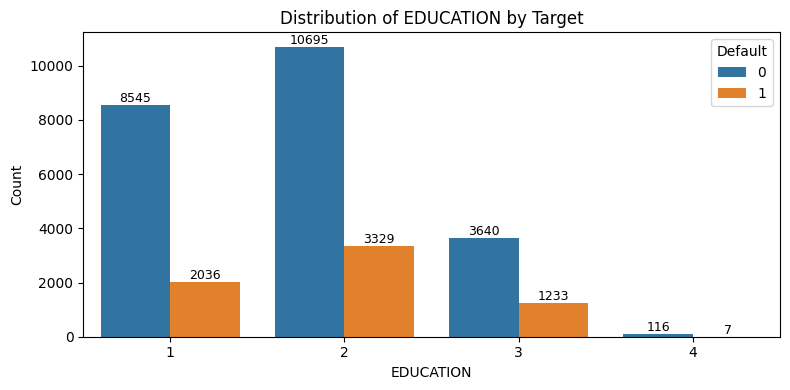

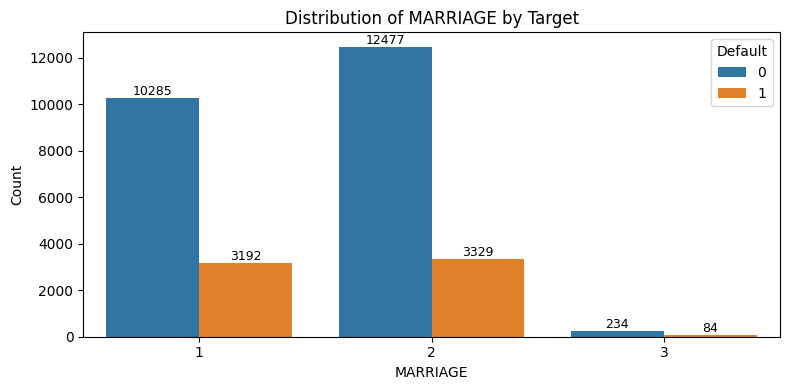

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols = ['SEX', 'EDUCATION', 'MARRIAGE']

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    ax = sns.countplot(x=col, data=df, hue='default.payment.next.month', order=sorted(df[col].unique()))
    plt.title(f'Distribution of {col} by Target')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Default')

    # Add count labels
    for p in ax.patches:
        height = int(p.get_height())
        if height > 0:
            ax.annotate(f'{height}',
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    plt.show()

The distributions of default vs non default appear to be consistent across the `SEX`, `EDUCATION` and `MARRIAGE` columns. All three columns seem to mirror the distribution of the entire sample. This can suggest that while these features can carry some predictive signal, they are not strong standalone indicators of deafult risk.

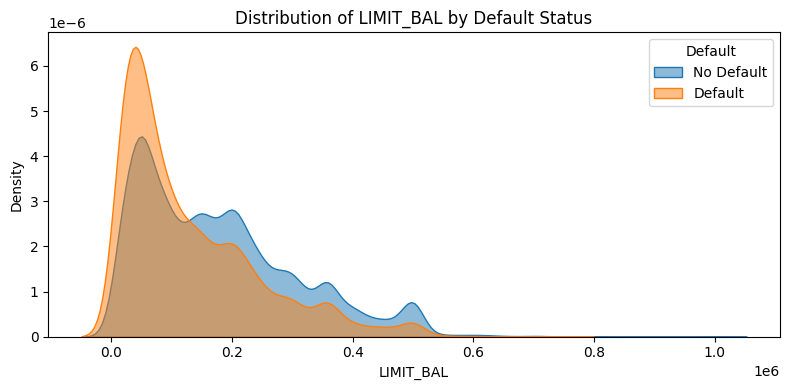

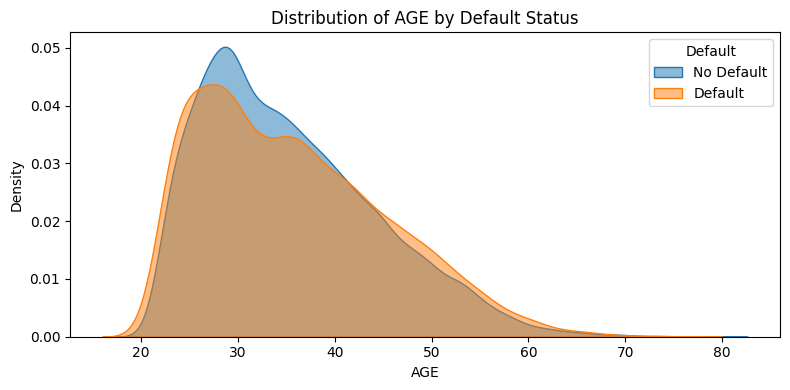

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a copy of the DataFrame with string labels for the target
df_kde = df.copy()
df_kde['default_str'] = df_kde['default.payment.next.month'].map({0: 'No Default', 1: 'Default'})

# Continuous columns to plot
continuous_cols = ['LIMIT_BAL', 'AGE']

# KDE plots
for col in continuous_cols:
    plt.figure(figsize=(8, 4))

    # Plot each group manually to ensure legend works
    for label in ['No Default', 'Default']:
        subset = df_kde[df_kde['default_str'] == label]
        sns.kdeplot(data=subset, x=col, fill=True, alpha=0.5, label=label)

    plt.title(f'Distribution of {col} by Default Status')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend(title='Default')
    plt.tight_layout()
    plt.show()


For the `LIMIT_BAL` column, we observe that when the credit limit balance is under 140,000 (which is 0.4 * 1e6), the probability of defaulting on the loan is higher than the probability of not defaulting. This makes sense as individuals with smaller credit limits may be more financially constrained or have less creditworthiness, making them more likely to default. Customers with higher credit limits seem to exhibit a lower default rate, potentially reflecting stronger financial profiles or better credit management.

For the `AGE` column, we observe that the distribution is skewed towards the younger age brackets, especially between 20 and 40 years old. Within the 25-40 age range, the proportion of customers who do not default is noticeably higher than those who do. This may suggest that individuals in this age group tend to have more stable income or better financial management skills, making them more capable of repaying their credit card loans on time. On the other hand, older customers above 40 may face different financial challenges, which could explain the higher default rates outside this range.

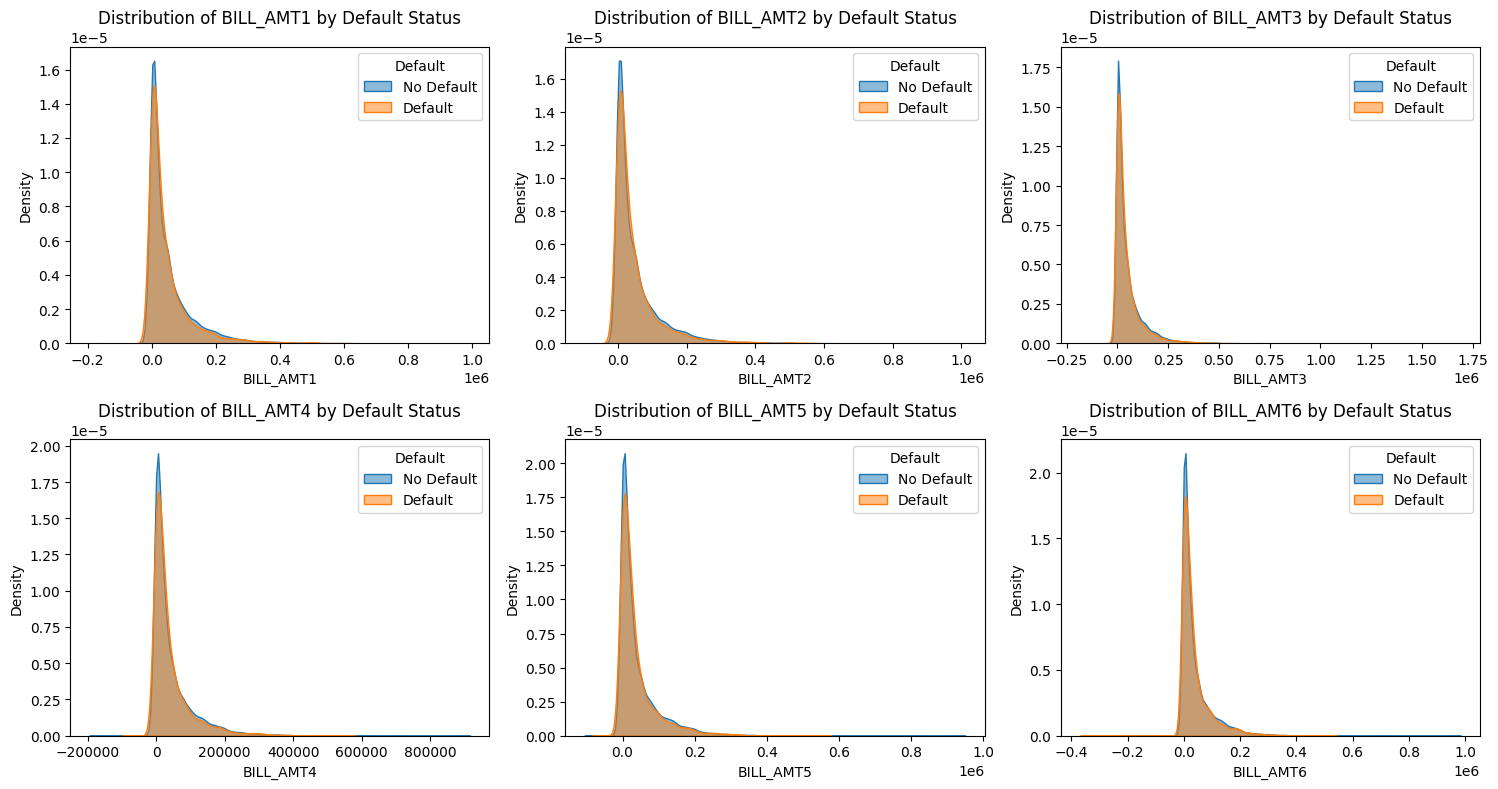

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Create a copy of the DataFrame with string labels for the target
df_kde = df.copy()
df_kde['default_str'] = df_kde['default.payment.next.month'].map({0: 'No Default', 1: 'Default'})

# Continuous columns to plot
continuous_cols = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

n_cols = 3  # Number of columns in the grid
n_rows = math.ceil(len(continuous_cols) / n_cols)

plt.figure(figsize=(5 * n_cols, 4 * n_rows))

for i, col in enumerate(continuous_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    for label in ['No Default', 'Default']:
        subset = df_kde[df_kde['default_str'] == label]
        sns.kdeplot(data=subset, x=col, fill=True, alpha=0.5, label=label)

    plt.title(f'Distribution of {col} by Default Status')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend(title='Default')

plt.tight_layout()
plt.show()


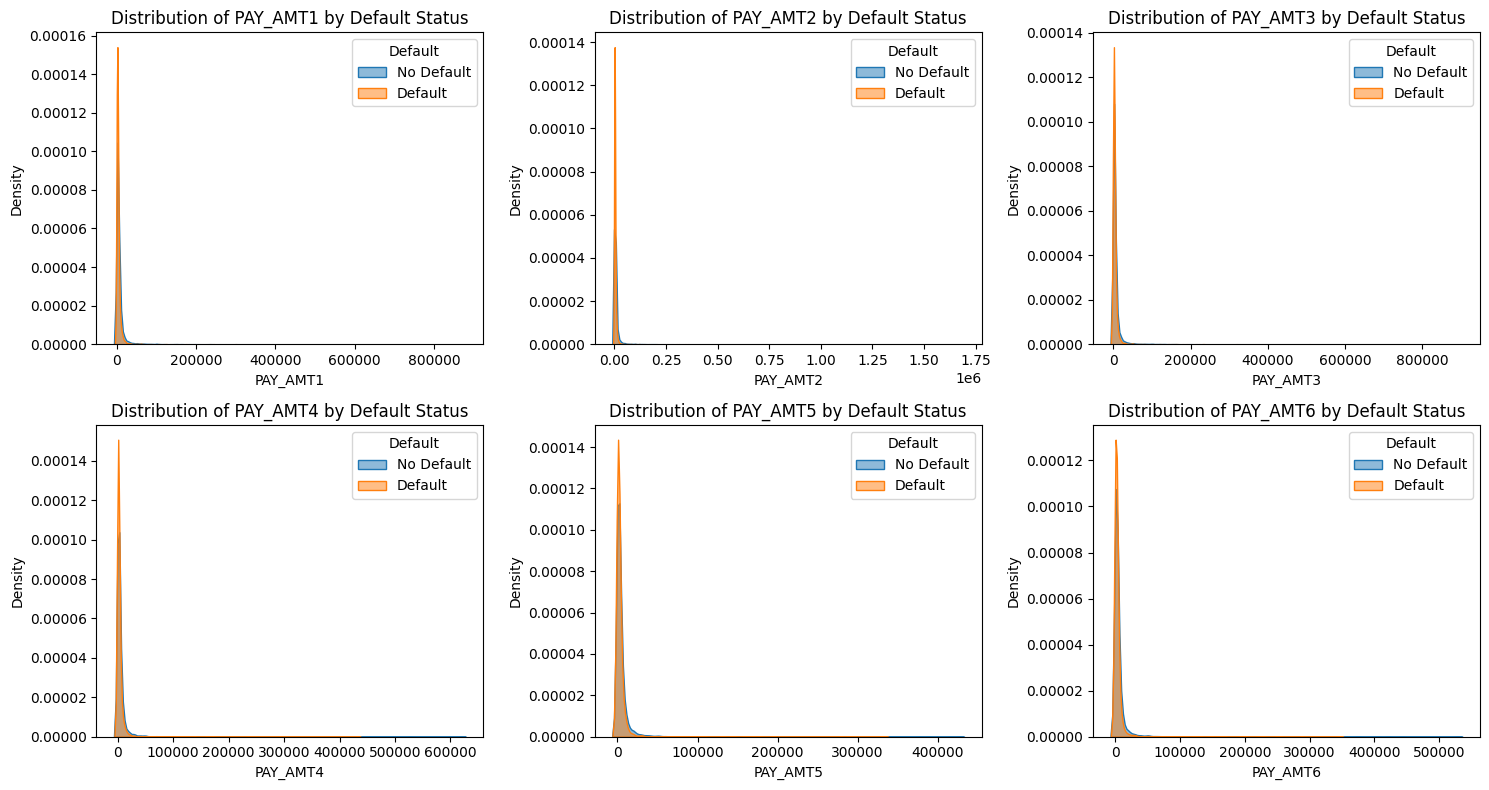

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

# # Create a copy of the DataFrame with string labels for the target
# df_kde = df.copy()
# df_kde['default_str'] = df_kde['default.payment.next.month'].map({0: 'No Default', 1: 'Default'})

# Continuous columns to plot
continuous_cols = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

n_cols = 3  # Number of columns in the grid
n_rows = math.ceil(len(continuous_cols) / n_cols)

plt.figure(figsize=(5 * n_cols, 4 * n_rows))

for i, col in enumerate(continuous_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    for label in ['No Default', 'Default']:
        subset = df_kde[df_kde['default_str'] == label]
        sns.kdeplot(data=subset, x=col, fill=True, alpha=0.5, label=label)

    plt.title(f'Distribution of {col} by Default Status')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend(title='Default')

plt.tight_layout()
plt.show()


Add text here later

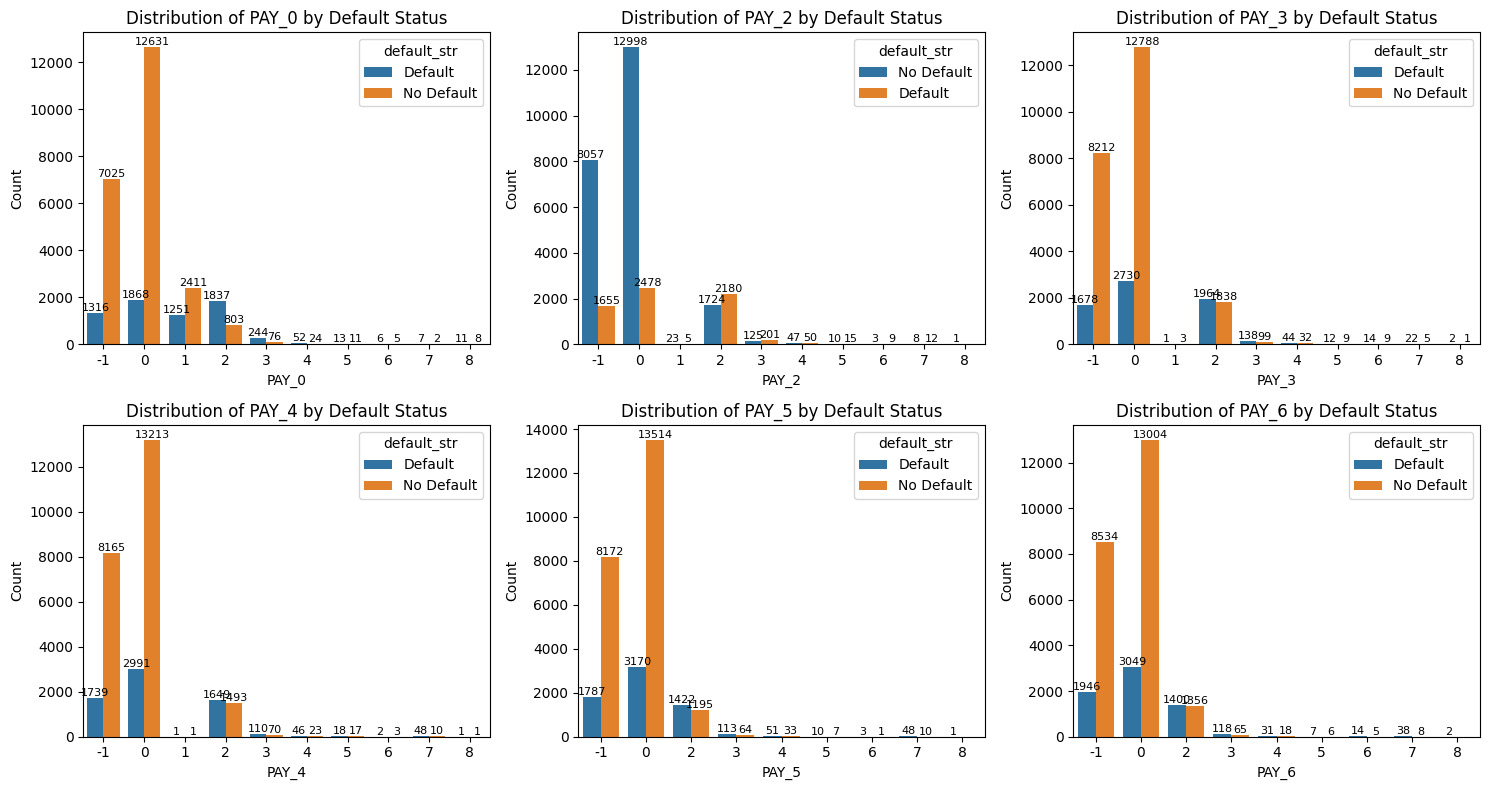

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

categorical_cols = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
n_cols = 3
n_rows = math.ceil(len(categorical_cols) / n_cols)

plt.figure(figsize=(5 * n_cols, 4 * n_rows))

for i, col in enumerate(categorical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    order = sorted(df_kde[col].dropna().unique())
    ax = sns.countplot(x=col, data=df_kde, hue='default_str', order=order)

    plt.title(f'Distribution of {col} by Default Status')
    plt.xlabel(col)
    plt.ylabel('Count')

    # Add count labels
    for p in ax.patches:
        height = int(p.get_height())
        if height > 0:
            ax.annotate(f'{height}',
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


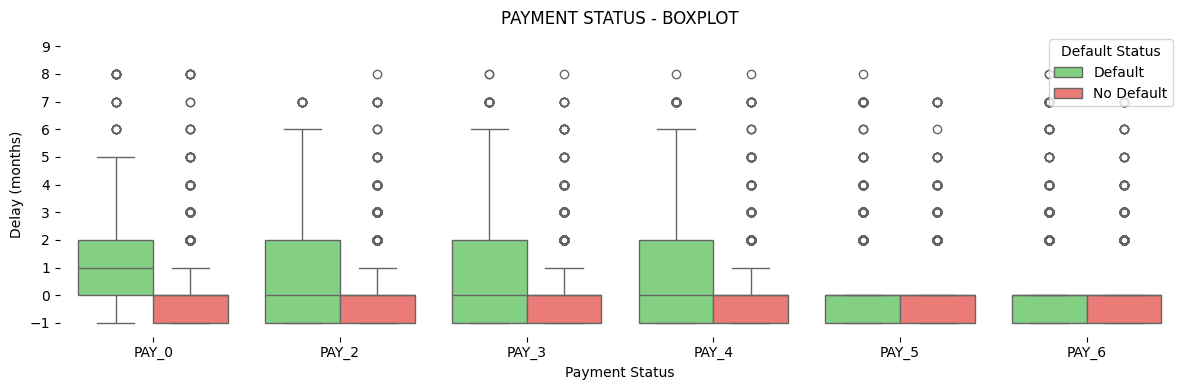

In [ ]:
import numpy as np
repayment = df_kde[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'default_str']]
repayment = pd.melt(repayment,
                    id_vars='default_str',
                    var_name='Payment Status',
                    value_name='Delay (months)')

plt.figure(figsize=(12, 4))
sns.boxplot(x='Payment Status', y='Delay (months)', hue='default_str',
            data=repayment, palette=sns.color_palette(('#77DD76', '#FF6962')),
            showfliers=True)

plt.ylim([-1.5, 9.5])
plt.yticks(np.arange(-1, 10))
plt.title('PAYMENT STATUS - BOXPLOT')
plt.legend(title='Default Status', loc='upper right')
plt.box(False)
plt.tight_layout()
plt.show()

For the `PAY_X` columns, we observe a trend where the likelihood of defaults begins to exceed non-defaults if the user is 2 months delayed on their previous credit card payments. This suggests that a payment delay of two months or more may be a critical threshold for default risk.

Additionally when we display the `PAY_X` columns using boxplots we find that `PAY_0` turns out to be a very useful column to separate the default and no default users, meaning that the user's payment behaviour during September strongly correlates with whether they end up defaulting or not. This is good to keep in mind when we check the feature importances later on to see whether the models describe PAY_0 as an important feature like we are suggesting here.

After focusing some time to looking at each column and its relation to the target variable, we move onto seeing the correlation between columns. We are using Pearson's correlation coefficient in order to determine whether there exists a linear relationship between 2 columns. The value of Pearson's Correlation Coefficient can be between -1 and 1, where :     

* +1 means they are highly correlated
* 0 means they are not correlated at all
* -1 means they are highly correlated in a negative direction (inversely proportional)

Note that it is possible for features to have non-linear relationships such as quadratic relationships - which will not be captured by Pearson's correlation coefficient.

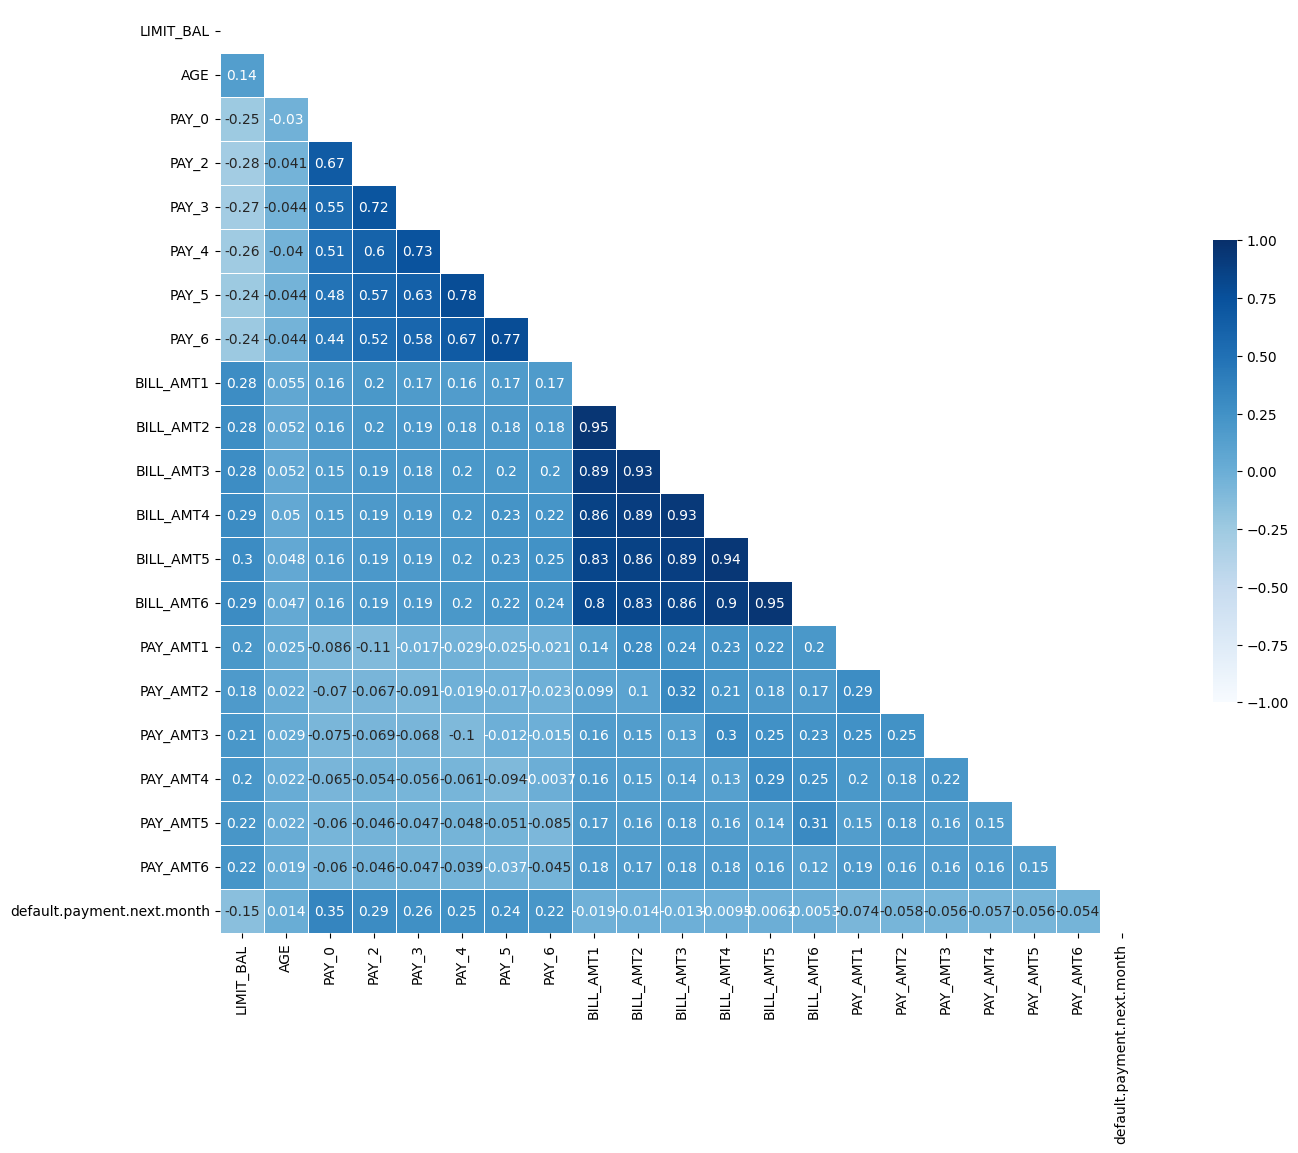

In [ ]:
numeric = ['LIMIT_BAL','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6', 'default.payment.next.month']
corr = df[numeric].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(18,12))
ax = sns.heatmap(corr, mask=mask, vmax=1, vmin=-1, center=0, square=True, linewidths=.5, cmap='Blues', cbar_kws={'shrink': .5}, annot=True, annot_kws={'size': 10})
cbar = ax.collections[0].colorbar

We observe that the `BILL_AMTX` columns show a strong positive correlation with each other which indicates potentially redundant information within our dataset. If we use a scatterplot to view the data distribution, the graphs confirm that the `BILL_AMTX` columns encode similar information.

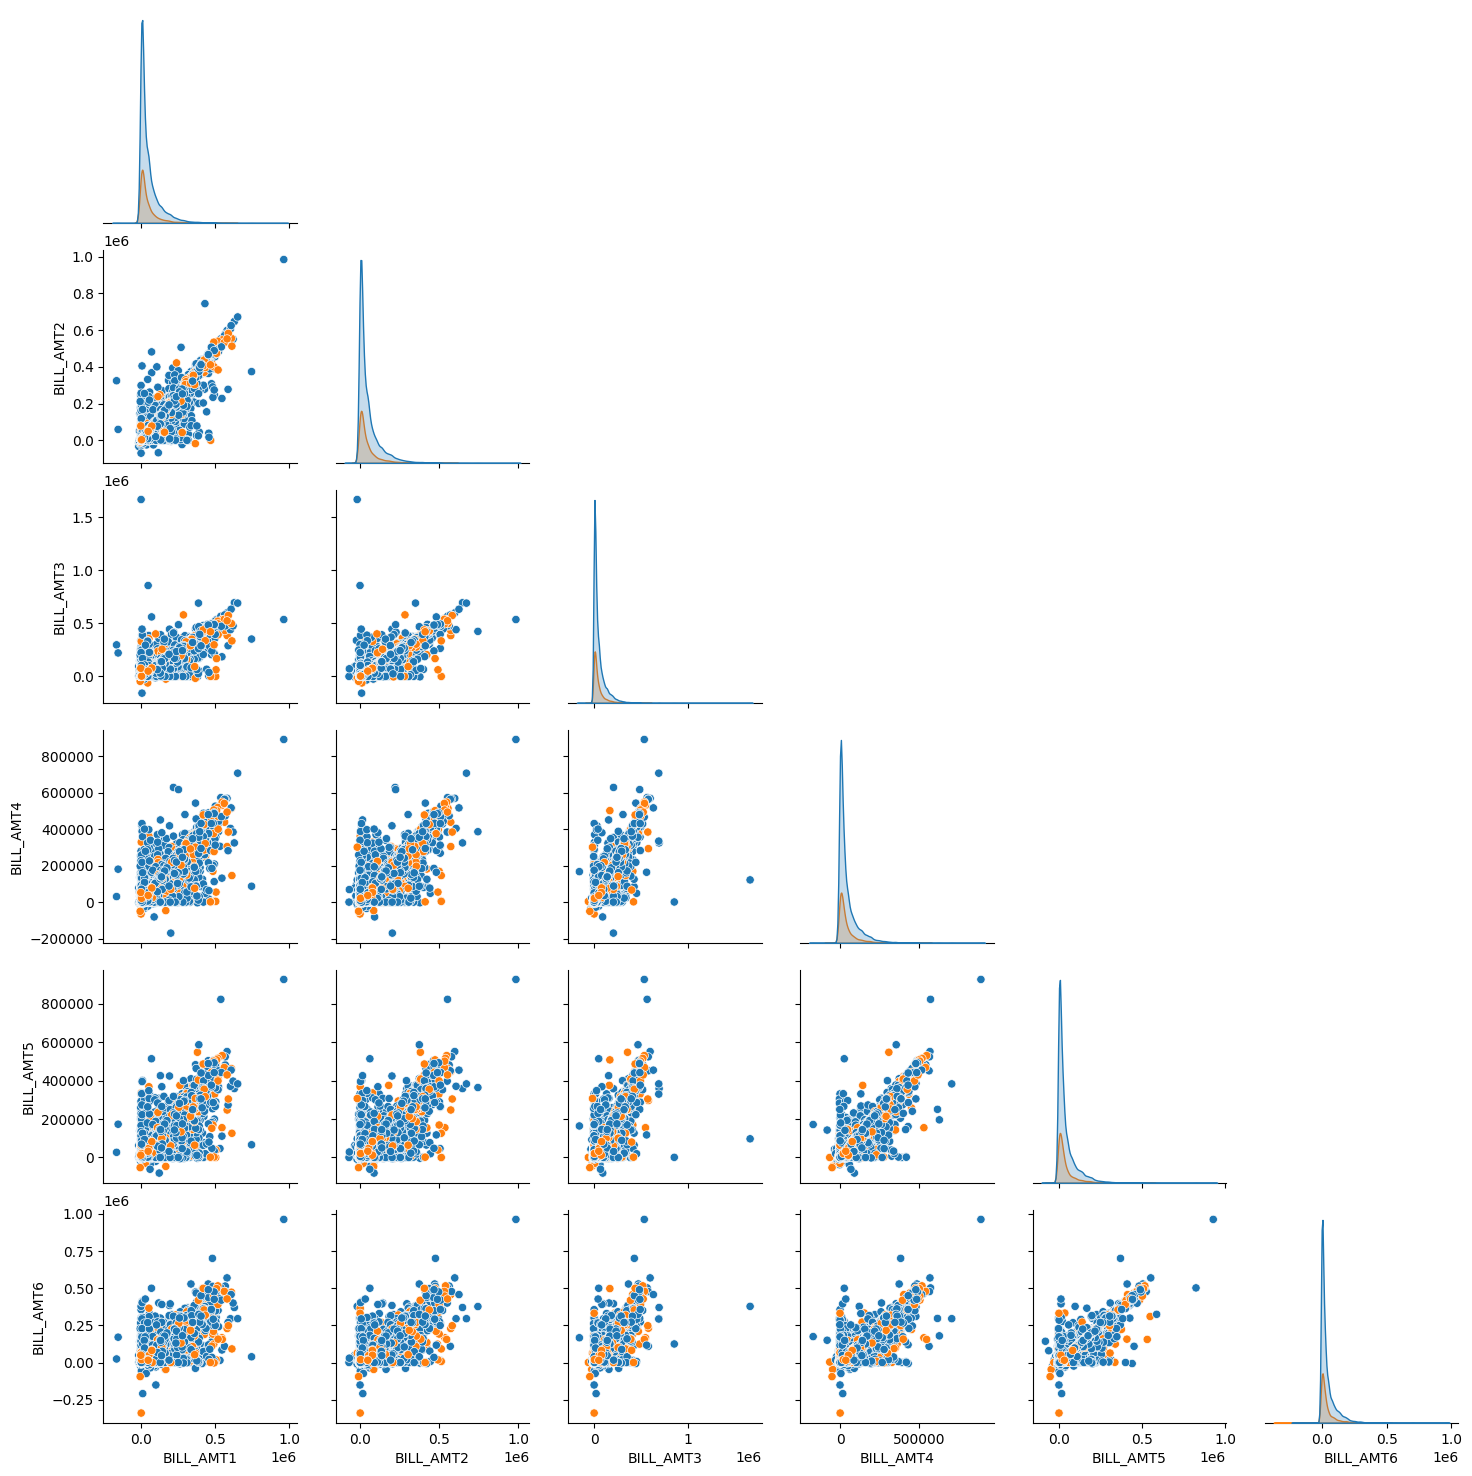

In [ ]:
pair_plot = sns.pairplot(df[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','default.payment.next.month']], hue='default.payment.next.month', diag_kind='kde', corner=True)
pair_plot._legend.remove()

Although decision tree–based models are less sensitive to multicollinearity than other models, having multiple strongly correlated features can still negatively impact performance—particularly in ensemble methods like random forests, where it can reduce model diversity. Highly correlated features can also hurt interpretability by diluting individual feature importance or making it unclear which feature is truly influencing the outcome.

There are a few techiques we can pursue in order to address cluster highly correlated features:
1. Only select 1 representative feature
2. Techniques like take the mean, median or do Principal Component Analysis (PCA)

It would be interesting to compare model performance when we apply PCA versus when we skip it, to evaluate its impact on accuracy and interpretability. We shall tackle this in the next section.

## Model

During the data exploration phase, we uncovered several key characteristics of the dataset — notably, class imbalance, presence of redundant features, and possible multicollinearity. These insights guide our modeling strategy as we transition into building a decision tree-based machine learning model for classification. Our approach incrementally introduces techniques to handle imbalance, improve generalization, and interpretability, organized into three distinct model levels.

---
**Model Levels**

**Level 1: Stratified Sampling**

Why: Since the dataset is imbalanced, using random sampling may lead to training subsets that underrepresent minority classes.

What: We use stratified sampling to ensure that the training and validation sets maintain the same class distribution as the original dataset.

Benefit: Prevents bias in the model due to uneven class distribution, especially important in metrics like recall and precision for minority classes.

**Level 2: Stratified Sampling + SMOTE (Synthetic Minority Over-sampling Technique)**

Why: Stratified sampling alone does not generate new data for the underrepresented classes.

What: We apply SMOTE to synthetically generate new examples for the minority class by interpolating between existing samples.

Benefit: Balances the class distribution, helping the model better learn the decision boundary between classes, reducing the likelihood of biased predictions.

**Level 3: Stratified Sampling + SMOTE + PCA (Principal Component Analysis)**

Why: Oversampling may introduce noise and increase dimensionality, which could lead to overfitting.

What: We incorporate PCA for dimensionality reduction, retaining components that explain most of the variance while removing noise and collinear features.

Benefit: Reduces model complexity and improves generalization by focusing on the most informative features. PCA can also accelerate model training and improve interpretability.

---
**Modeling Techniques**

In addition to the three-tiered approach, we implement several techniques to ensure robustness, generalizability, and interpretability:

**Cross-Validation** : We use k-fold cross-validation to evaluate model performance across different subsets of the data, helping avoid overfitting to a particular train-test split.

**Regularization Parameters** : While decision trees can inherently overfit, tuning hyperparameters act as regularization to prevent overly complex trees.

**Grid Search** : A grid search is employed to find the optimal combination of hyperparameters, systematically exploring a predefined set of values.

---
**Model Evaluation Metrics**

To evaluate and compare models at each level, we use:

**Confusion Matrix** : Provides a breakdown of true positives, false positives, true negatives, and false negatives.

**Classification Report** : Includes precision, recall, F1-score, and support for each class.

**Feature Importance** : For tree-based models, we examine the relative importance of features in the decision-making process, helping us understand the driving factors behind predictions.

**SHAP (SHapley Additive exPlanations)**: A more advanced and consistent method for interpreting individual predictions. SHAP values help identify how each feature contributes (positively or negatively) to a specific prediction, enhancing model transparency and trust.

### Pre-processing

In [ ]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

We first drop the ID column as it does not carry predictive information and may introduce noise or lead to data leakage if retained during model training.

In [ ]:
# Drop ID column
df = df.drop(columns=['ID'])

We then separate the feature and target variables into `X_train`, `X_test`, `y_train`, `y_test` using `train_test_split` indicating `stratify=y` and `random_state=23` for reproducability. At this point we have already finished preparing the data for Level 1.

In [ ]:
# Features and target
X = df.drop(columns=['default.payment.next.month'])
y = df['default.payment.next.month']

# Applying stratified sampling here
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=23)

To prepare the data for Level 2, we import SMOTE and apply it to our Level 1 data to oversample the minority class (default, in our case) and Counter to count the data samples before and after resampling.

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Show class distribution before SMOTE
print("Before SMOTE:", Counter(y_train))

# Apply SMOTE
sm = SMOTE(random_state=23)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

# Show class distribution after SMOTE
print("After SMOTE:", Counter(y_train_sm))

Before SMOTE: Counter({0: 18396, 1: 5284})
After SMOTE: Counter({1: 18396, 0: 18396})


Finally, we prepare our data for Level 3 by scaling Level 2 data and applying dimensionality reduction through PCA. We scale the features first because if features have different scales, the feature with the larger scale will dominate the principal components, regardless of its true importance.

We apply PCA and keep 95% of the variance (this is the usual standard).

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize features before PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_sm)
X_test_scaled = scaler.transform(X_test)

# Apply PCA (e.g., keep 95% variance)
pca = PCA(n_components=0.95, random_state=23)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Original feature count: {X_train.shape[1]}")
print(f"Reduced feature count after PCA: {X_train_pca.shape[1]}")

Original feature count: 23
Reduced feature count after PCA: 15


To show visibility and transparency in the PCA step, the code below performs both a visual and tabular analysis of the variance explained by each principal component.

First, a line plot is generated showing:
* The individual explained variance of each principal component (blue line).
* The cumulative explained variance across components (orange line).

This plot helps us visually identify how many components are needed to retain a desired amount of variance (95%), which informs decisions on dimensionality reduction without losing significant information.

Second, a summary table is created to show the following :
* Lists the cumulative explained variance for each principal component.
* Displays the values in percentage format for easier interpretation.


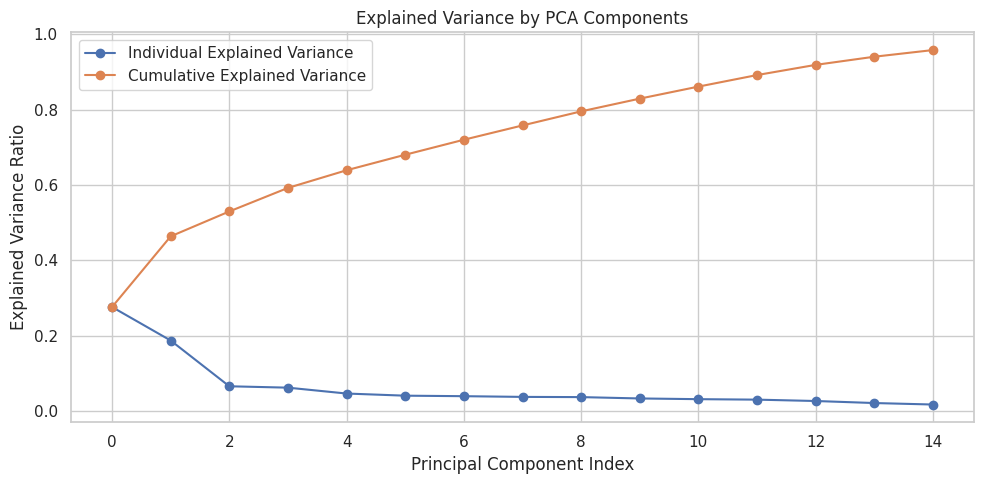

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
Cumulative Explained Variance,27.65%,46.41%,53.02%,59.27%,63.96%,68.07%,72.06%,75.85%,79.59%,82.97%,86.16%,89.22%,91.93%,94.09%,95.86%


In [ ]:
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Plot explaining variance ---
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
plt.plot(pca.explained_variance_ratio_, marker='o', label='Individual Explained Variance')
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', label='Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance Ratio')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

# --- Create cumulative variance summary table ---
cumsum = np.cumsum(pca.explained_variance_ratio_)
pc = pca.n_components_
indexes = ['PC' + str(i) for i in range(1, pc+1)]

cumsum_df = pd.DataFrame(data=cumsum, index=indexes, columns=['var1'])
cumsum_df['var2'] = cumsum_df['var1'].round(4)
cumsum_df['Cumulative Explained Variance'] = cumsum_df['var2'].apply(lambda x: f"{x*100:.2f}%")
cumsum_df = cumsum_df.drop(['var1','var2'], axis=1)

# Display first 15 principal components' variance
display(cumsum_df.T.iloc[:,:15])

### Random Forest

To optimize our Random Forest model, we define a param_grid that includes key hyperparameters affecting model complexity, diversity, and performance. These parameters are tuned using Grid Search with cross-validation to identify the best combination for generalization and accuracy.

Explanation of Each Parameter:
* **n_estimators**: The number of trees in the forest. More trees generally improve performance but increase computation time.
* **max_depth**: The maximum depth of each tree. Shallow trees generalize better (prevent overfitting), while deeper trees can capture more complex patterns but risk overfitting.
* **min_samples_split**: The minimum number of samples required to split an internal node. A higher value results in fewer splits and simpler trees, promoting generalization.
* **min_samples_leaf**: The minimum number of samples required to be at a leaf node. Higher values prevent overly deep trees by ensuring that leaf nodes represent a sufficient number of samples.
* **max_features**: The number of features to consider when looking for the best split. Setting this to 'sqrt' means each tree considers a random subset of features (square root of total features).
* **bootstrap**: Whether to use bootstrapped samples when building trees. If True, each tree is trained on a randomly sampled subset (with replacement) of the training data. This adds randomness and reduces variance.
* **criterion**: The function used to measure the quality of a split.

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt'],
    'bootstrap': [True],
    'criterion': ['gini', 'entropy', 'log_loss']
}

To enhance the interpretability of our model, we define a helper function plot_feature_importances that visualizes the top N most important features based on the trained decision tree-based model.

In [ ]:
import shap
import numpy as np

def plot_feature_importances(model, feature_names, top_n=10, title="Feature Importances"):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1][:top_n]

    plt.figure(figsize=(10, 6))
    plt.barh(range(top_n), importances[indices][::-1], align='center')
    plt.yticks(range(top_n), [feature_names[i] for i in indices][::-1])
    plt.xlabel("Importance Score")
    plt.title(title)
    plt.tight_layout()
    plt.show()

#### Stratified Sampling

To optimize our Random Forest model, we use `GridSearchCV`, which systematically tests combinations of hyperparameters defined in `param_grid` to find the best-performing configuration. Currently we will be using 5-fold for each combination for `param_grid`.

`class_weight='balanced'` adjusts weights inversely proportional to class frequencies to help handle class imbalance.

`random_state=23` ensures reproducibility.

`scoring='f1'` uses the F1 score as the performance metric, which balances precision and recall—important for imbalanced datasets.

In [ ]:
rf = RandomForestClassifier(class_weight='balanced', random_state=23)

grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, scoring='f1', n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=23),
             n_jobs=-1,
             param_grid={'bootstrap': [True],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [10, 20], 'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='f1', verbose=2)

Random Forest Training Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.88     18396
           1       0.59      0.65      0.62      5284

    accuracy                           0.82     23680
   macro avg       0.74      0.76      0.75     23680
weighted avg       0.83      0.82      0.82     23680



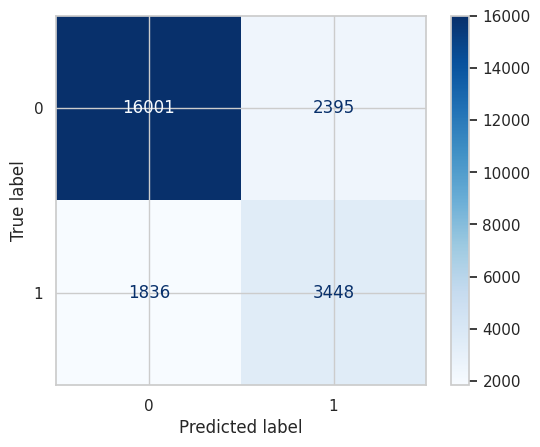

In [ ]:
# Predict on training data
y_train_pred = grid_search_rf.best_estimator_.predict(X_train)

# Print classification report
print("Random Forest Training Classification Report:")
print(classification_report(y_train, y_train_pred))

# Print and display confusion matrix
cm = confusion_matrix(y_train, y_train_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search_rf.best_estimator_.classes_)
disp.plot(cmap='Blues')

RF Testing Classification report:
              precision    recall  f1-score   support

           0       0.87      0.84      0.86      4600
           1       0.51      0.58      0.54      1321

    accuracy                           0.78      5921
   macro avg       0.69      0.71      0.70      5921
weighted avg       0.79      0.78      0.79      5921



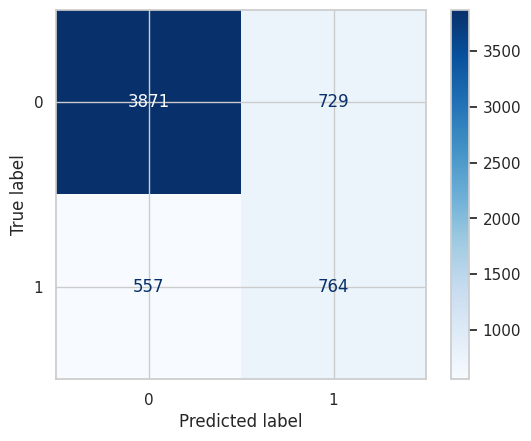

In [ ]:
y_test_pred = grid_search_rf.best_estimator_.predict(X_test)
print("RF Testing Classification report:")
print(classification_report(y_test, y_test_pred))

# Print and display confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search_rf.best_estimator_.classes_)
disp.plot(cmap='Blues')

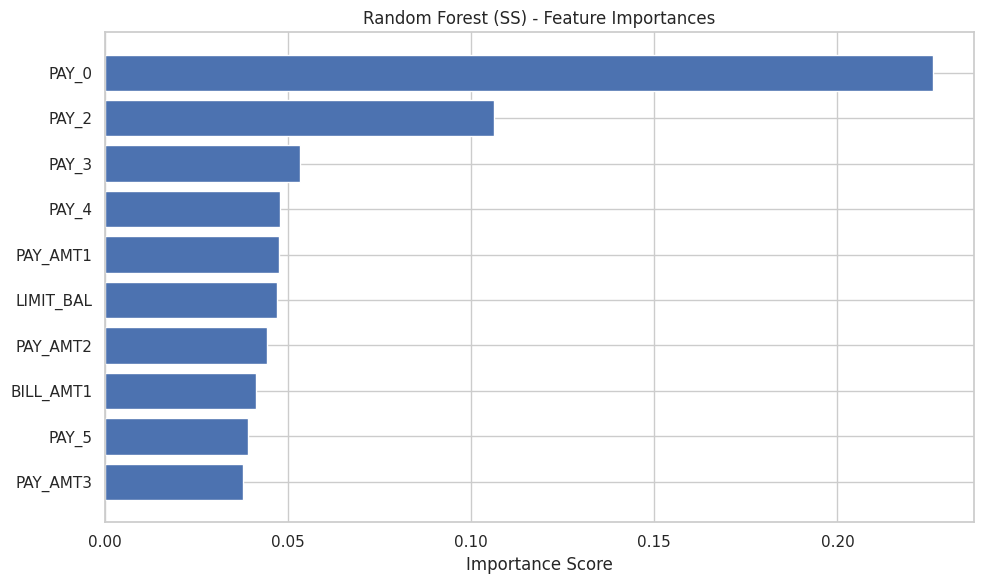

In [ ]:
plot_feature_importances(
    model=grid_search_rf.best_estimator_,
    feature_names=X_train.columns,
    title="Random Forest (SS) - Feature Importances"
)

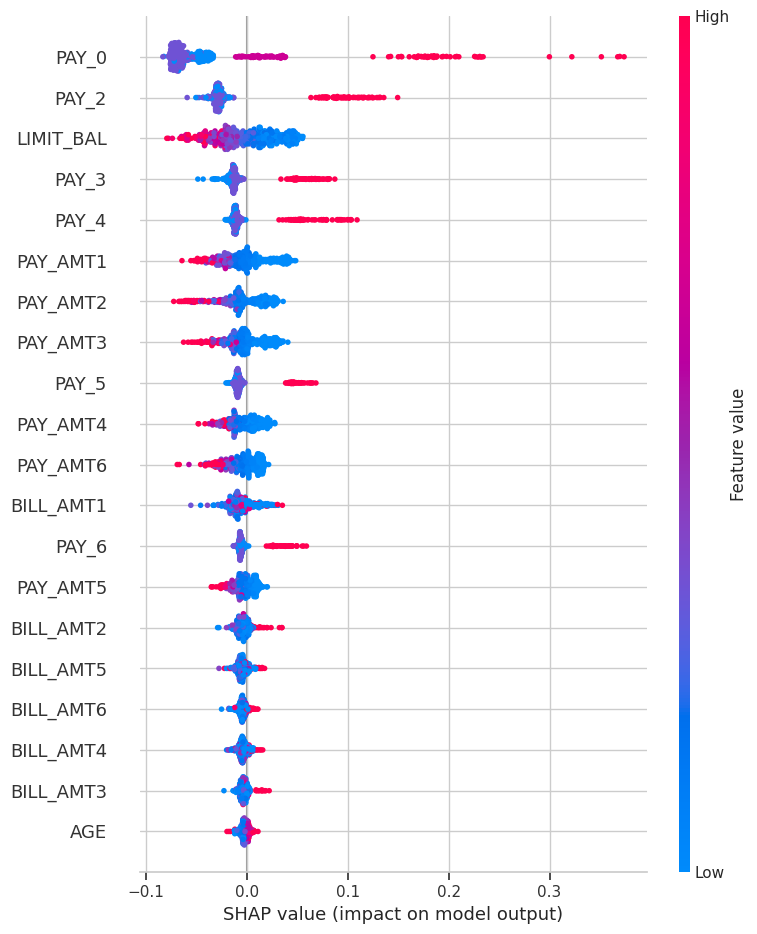

In [ ]:
import shap
import pandas as pd

X_test_df = pd.DataFrame(X_test, columns=X_train.columns)
explainer = shap.TreeExplainer(grid_search_rf.best_estimator_)

# Take a small sample to explain
sample_idx = X_test_df.sample(n=500, random_state=42)
shap_values_sample = explainer.shap_values(sample_idx)
shap.summary_plot(shap_values_sample[:, :, 1], sample_idx)

In [ ]:
import joblib

# Save the best model
joblib.dump(grid_search_rf.best_estimator_, 'rf_best_model_1.pkl')

['rf_best_model_1.pkl']

#### Stratified Sampling + SMOTE

In [ ]:
rf = RandomForestClassifier(class_weight='balanced', random_state=23)

grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, scoring='f1', n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train_sm, y_train_sm)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=23),
             n_jobs=-1,
             param_grid={'bootstrap': [True],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [10, 20], 'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='f1', verbose=2)

Random Forest Training Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     18396
           1       0.99      0.99      0.99     18396

    accuracy                           0.99     36792
   macro avg       0.99      0.99      0.99     36792
weighted avg       0.99      0.99      0.99     36792



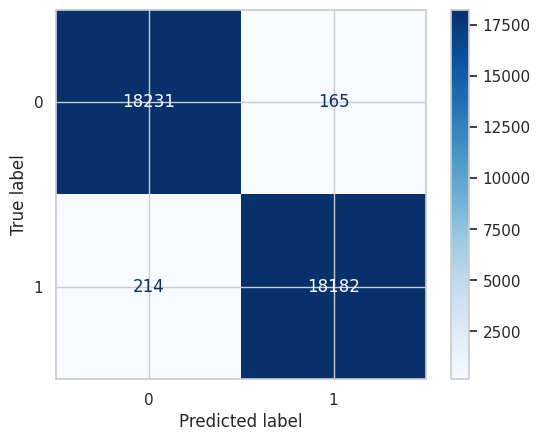

In [ ]:
# Predict on training data
y_train_pred = grid_search_rf.best_estimator_.predict(X_train_sm)

# Print classification report
print("Random Forest Training Classification Report:")
print(classification_report(y_train_sm, y_train_pred))

# Print and display confusion matrix
cm = confusion_matrix(y_train_sm, y_train_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search_rf.best_estimator_.classes_)
disp.plot(cmap='Blues')

RF Testing Classification report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      4600
           1       0.51      0.49      0.50      1321

    accuracy                           0.78      5921
   macro avg       0.68      0.68      0.68      5921
weighted avg       0.78      0.78      0.78      5921



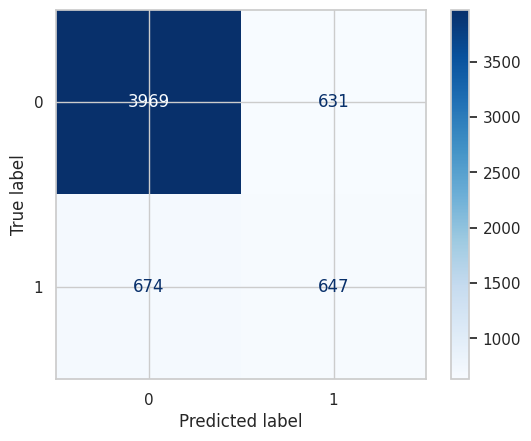

In [ ]:
y_test_pred = grid_search_rf.best_estimator_.predict(X_test)
print("RF Testing Classification report:")
print(classification_report(y_test, y_test_pred))

# Print and display confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search_rf.best_estimator_.classes_)
disp.plot(cmap='Blues')

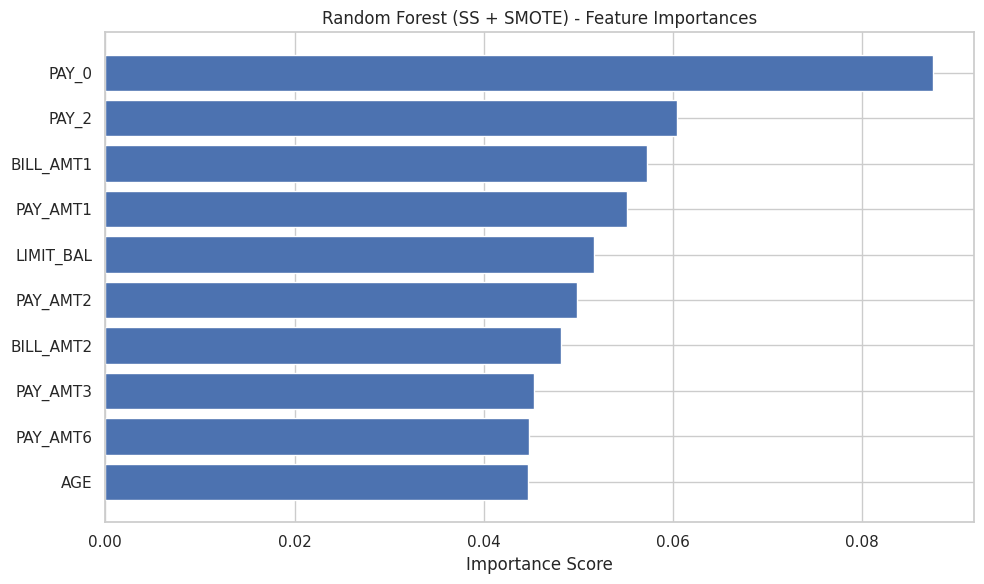

In [ ]:
plot_feature_importances(
    model=grid_search_rf.best_estimator_,
    feature_names=X_train_sm.columns,
    title="Random Forest (SS + SMOTE) - Feature Importances"
)

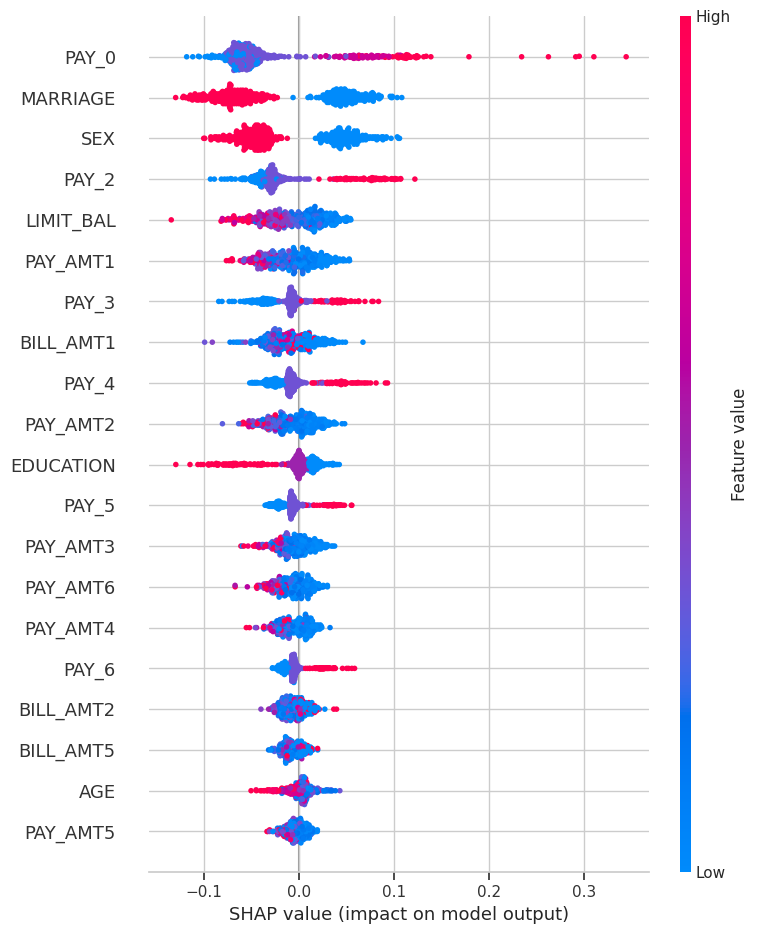

In [ ]:
import shap
import pandas as pd

X_test_df = pd.DataFrame(X_test, columns=X_train_sm.columns)
explainer = shap.TreeExplainer(grid_search_rf.best_estimator_)

# Take a small sample to explain
sample_idx = X_test_df.sample(n=500, random_state=42)
shap_values_sample = explainer.shap_values(sample_idx)
shap.summary_plot(shap_values_sample[:, :, 1], sample_idx)

In [ ]:
# Save the best model
joblib.dump(grid_search_rf.best_estimator_, 'rf_best_model_2.pkl')

['rf_best_model_2.pkl']

#### Stratified Sampling + SMOTE + PCA

In [ ]:
rf = RandomForestClassifier(class_weight='balanced', random_state=23)

grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, scoring='f1', n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train_pca, y_train_sm)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=23),
             n_jobs=-1,
             param_grid={'bootstrap': [True],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [10, 20], 'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='f1', verbose=2)

Random Forest Training Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     18396
           1       1.00      0.99      0.99     18396

    accuracy                           0.99     36792
   macro avg       0.99      0.99      0.99     36792
weighted avg       0.99      0.99      0.99     36792



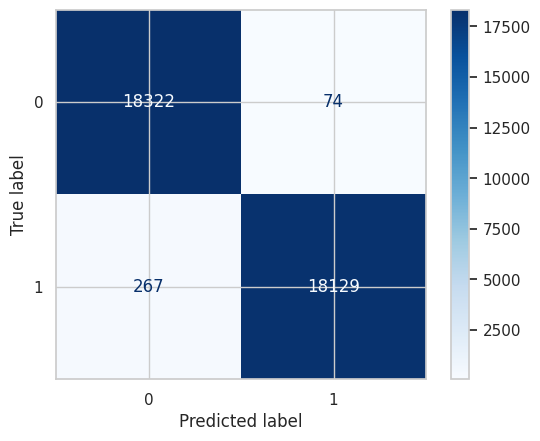

In [ ]:
# Predict on training data
y_train_pred = grid_search_rf.best_estimator_.predict(X_train_pca)

# Print classification report
print("Random Forest Training Classification Report:")
print(classification_report(y_train_sm, y_train_pred))

# Print and display confusion matrix
cm = confusion_matrix(y_train_sm, y_train_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search_rf.best_estimator_.classes_)
disp.plot(cmap='Blues')

RF Testing Classification report:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      4600
           1       0.45      0.53      0.49      1321

    accuracy                           0.75      5921
   macro avg       0.65      0.67      0.66      5921
weighted avg       0.77      0.75      0.76      5921



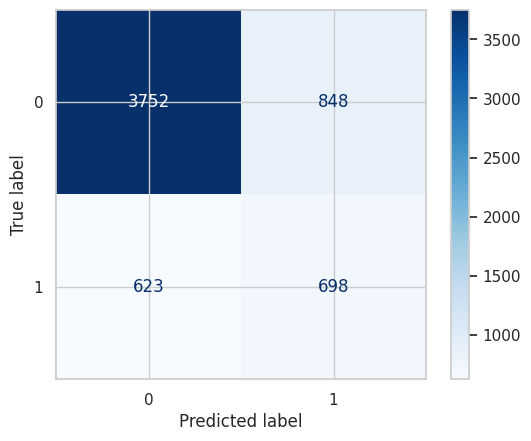

In [ ]:
y_test_pred = grid_search_rf.best_estimator_.predict(X_test_pca)
print("RF Testing Classification report:")
print(classification_report(y_test, y_test_pred))

# Print and display confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search_rf.best_estimator_.classes_)
disp.plot(cmap='Blues')

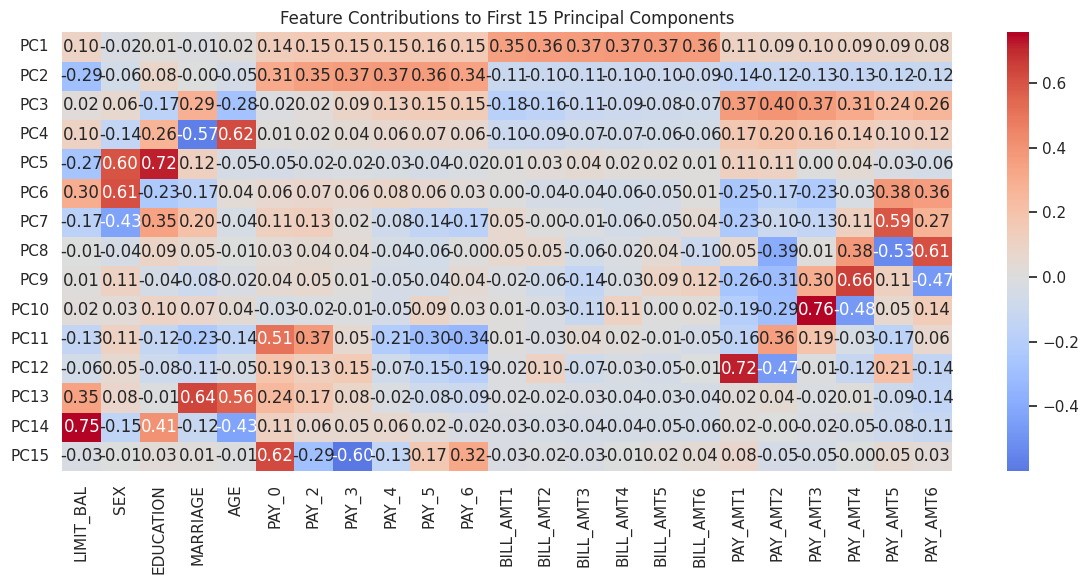

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assume X_train.columns is available
pca_components = pd.DataFrame(
    pca.components_,
    columns=X_train.columns,
    index=[f'PC{i+1}' for i in range(pca.n_components_)]
)

# Plot heatmap of first N principal components
plt.figure(figsize=(12, 6))
sns.heatmap(pca_components.head(15), cmap='coolwarm', center=0, annot=True, fmt=".2f")
plt.title("Feature Contributions to First 15 Principal Components")
plt.tight_layout()
plt.show()


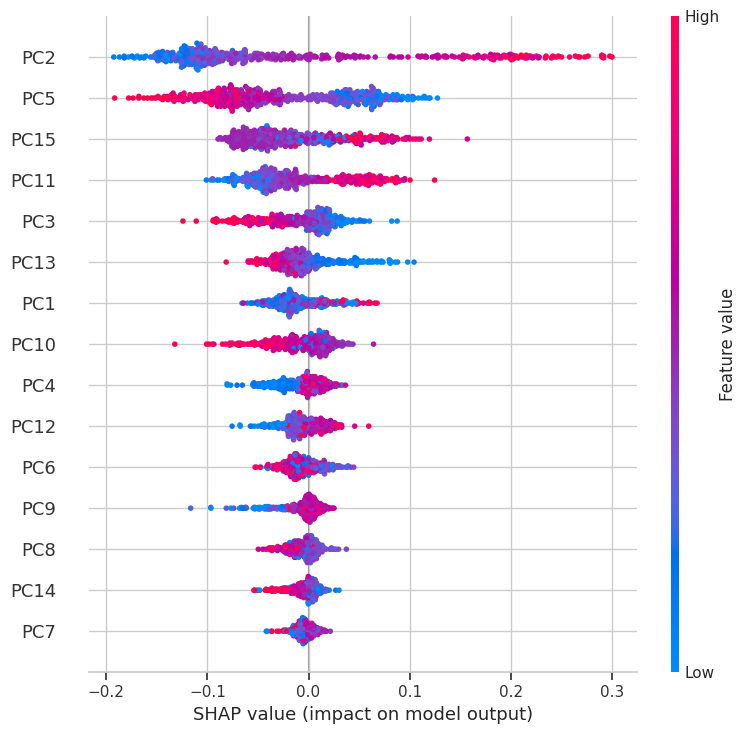

In [ ]:
n_components = X_test_pca.shape[1]
pca_columns = [f"PC{i+1}" for i in range(n_components)]

X_test_df = pd.DataFrame(X_test_pca, columns=pca_columns)
explainer = shap.TreeExplainer(grid_search_rf.best_estimator_)

# Take a small sample to explain
sample_idx = X_test_df.sample(n=500, random_state=42)
shap_values_sample = explainer.shap_values(sample_idx)
shap.summary_plot(shap_values_sample[:, :, 1], sample_idx)

In [ ]:
# Save the best model
joblib.dump(grid_search_rf.best_estimator_, 'rf_best_model_3.pkl')

['rf_best_model_3.pkl']

#### Evaluation

In [3]:
import pandas as pd

# Create a dictionary with your data
data = {
    'Method': [
        'SS',
        'SS + SMOTE',
        'SS + SMOTE + PCA'
    ],
    'Training Accuracy': [0.82, 0.99, 0.99],  # training accuracy from your outputs
    'Test Accuracy': [0.78, 0.78, 0.75],
    'Class 0 F1 (Test)': [0.86, 0.86, 0.84],
    'Class 1 F1 (Test)': [0.54, 0.50, 0.49],
    'Macro F1 (Test)': [0.70, 0.68, 0.66]
}

# Create DataFrame
print(pd.DataFrame(data))

             Method  Training Accuracy  Test Accuracy  Class 0 F1 (Test)  \
0                SS               0.82           0.78               0.86   
1        SS + SMOTE               0.99           0.78               0.86   
2  SS + SMOTE + PCA               0.99           0.75               0.84   

   Class 1 F1 (Test)  Macro F1 (Test)  
0               0.54             0.70  
1               0.50             0.68  
2               0.49             0.66  


**Level 1: Stratified Sampling Only**

The model achieves an overall accuracy of 82% on training and 78% on testing, indicating reasonable generalization with a slight drop in performance, which is expected and typical in machine learning models. However, a deeper look at the classification report and confusion matrix reveals a clear imbalance in how the model treats the two classes.

The model performs significantly better on class 0 than on class 1, showing higher precision, recall, and F1-score for the majority class. This highlights the class imbalance issue, and to some extent, overfitting, as the model fails to generalize well to class 1.

Feature importance (based on the built-in Random Forest feature importance scores) shows that the PAY_X features dominate the model’s decisions, particularly PAY_0, which has the highest importance score (0.23). This means that the model heavily relies on this feature for classification decisions.

**Level 2: Stratified Sampling + SMOTE**

After applying SMOTE (Synthetic Minority Over-sampling Technique), the training performance surges dramatically — reaching 99% precision, recall, and F1-score for both classes. However, the test performance remains nearly identical to Level 1, especially for class 1.

This stark contrast between training and test performance suggests that the model is overfitting to the synthetic examples generated by SMOTE. In other words, while SMOTE helps balance the class distribution during training, the model is not learning patterns that generalize well to real-world, unseen minority class instances.

Feature importance again shows PAY_0 as the top contributing variable, though its importance score drops slightly to 0.09. This indicates the model may be spreading importance across more features, possibly due to the more balanced training data — but still remains overly dependent on a small set of features.

**Level 3: Stratified Sampling + SMOTE + PCA**

With PCA (Principal Component Analysis) added, the model maintains very high training scores, indicating it still fits the synthetic and original data very well. However, test performance — especially the class 1 F1-score — drops slightly from the previous level.

This suggests that while PCA effectively reduces dimensionality, it may also remove some features that contain subtle but important signals for identifying class 1 cases. As a result, PCA has not reduced overfitting and may have introduced mild underfitting by discarding useful variance.

The SHAP analysis shows that PC2 (the second principal component) has the most influence on model output. When examining the vectors, it becomes clear that the PAY_x features heavily contributes to PC2, confirming that this feature still drives much of the decision-making even after transformation.



### Gradient Boosting

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
param_grid_xgb = {
    'n_estimators': [100, 300],
    'max_depth': [3, 5, 7],                        # smaller trees generalize better
    'learning_rate': [0.01, 0.05, 0.1],            # smaller LR to reduce overfitting
    'subsample': [0.6, 0.8],                       # randomly sample rows
    'colsample_bytree': [0.6, 0.8],                # randomly sample features
    'reg_alpha': [0, 0.1, 1],                      # L1 regularization
    'reg_lambda': [1, 5, 10],                      # L2 regularization
}

Reusing the same train/test splits from the Random Forest setup to ensure a fair comparison between the models.

* n_estimators : how many trees
* learning_rate : controls the degree to which each tree is allowed to correct * the mistakes of previous trees.
* max_depth : max depth of tree
* colsample_bytree : similar to max_features in Random Forest. It is the fraction of features to sample for each tree.
* min_child_weight : This is the XGBoost Equivalent of min_samples_split. It is the minimum sum of instace weight in a child.

#### Stratified Sampling

In [ ]:
xgb = XGBClassifier(
    objective='binary:logistic',   # optimize log-loss internally
    eval_metric='auc',             # measure performance by class-separation quality
    # tree_method='gpu_hist',        # Enable GPU
    use_label_encoder=False,
    scale_pos_weight=round(len(y_train[y_train == 0]) / len(y_train[y_train == 1])),
    random_state=23
)

grid_search_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid_xgb,
    cv=5,
    scoring='f1',
    verbose=2,
    n_jobs=-1
)

grid_search_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:24:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='auc', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=23, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 300],
                         'reg_alpha': [0, 0.1, 1], 'reg_lambda': [1, 5, 10],
                         'subsample': [0.6, 0.8]},
             scoring='f1', verbose=2)

GB Training Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.84      0.86     18396
           1       0.52      0.61      0.56      5284

    accuracy                           0.79     23680
   macro avg       0.70      0.72      0.71     23680
weighted avg       0.80      0.79      0.79     23680



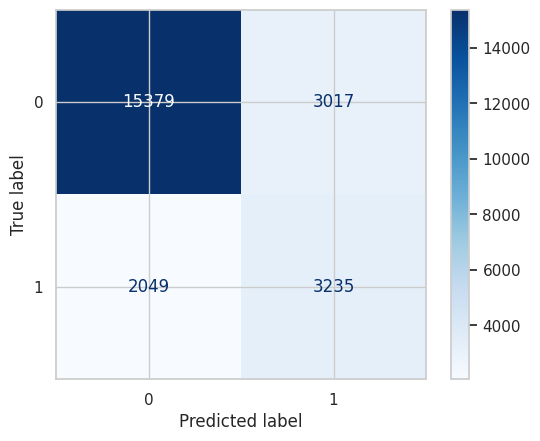

In [ ]:
y_train_pred = grid_search_xgb.best_estimator_.predict(X_train)
print("GB Training Classification Report:")
print(classification_report(y_train, y_train_pred))

# Print and display confusion matrix
cm = confusion_matrix(y_train, y_train_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search_xgb.best_estimator_.classes_)
disp.plot(cmap='Blues')

GB Testing Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.82      0.85      4600
           1       0.49      0.60      0.54      1321

    accuracy                           0.77      5921
   macro avg       0.69      0.71      0.70      5921
weighted avg       0.79      0.77      0.78      5921



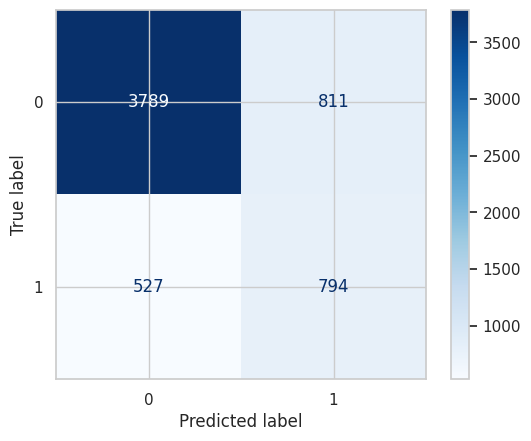

In [ ]:
y_test_pred = grid_search_xgb.best_estimator_.predict(X_test)

print("GB Testing Classification Report:")
print(classification_report(y_test, y_test_pred))

# Print and display confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search_xgb.best_estimator_.classes_)
disp.plot(cmap='Blues')

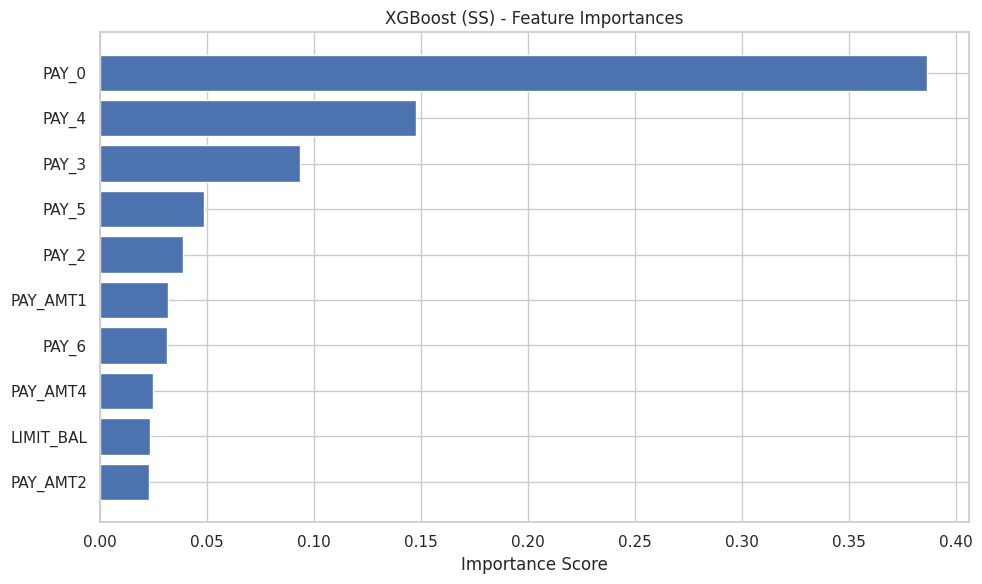

In [ ]:
plot_feature_importances(
    model=grid_search_xgb.best_estimator_,
    feature_names=X_train.columns,
    title="XGBoost (SS) - Feature Importances"
)

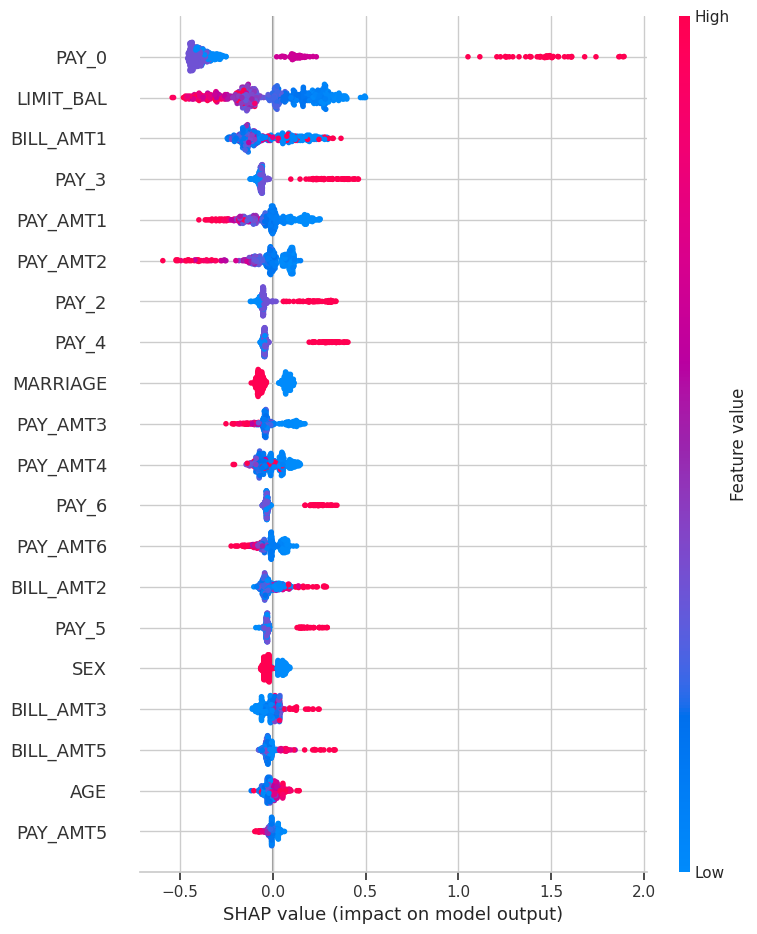

In [ ]:
X_test_df = pd.DataFrame(X_test, columns=X_train.columns)
explainer = shap.Explainer(grid_search_xgb.best_estimator_)

sample_idx = X_test_df.sample(n=500, random_state=42)
shap_values_sample = explainer.shap_values(sample_idx)

# Summary plot for XGBoost
shap.summary_plot(shap_values_sample, sample_idx)

In [ ]:
# Save the best model
joblib.dump(grid_search_rf.best_estimator_, 'xgb_best_model_1.pkl')

['xgb_best_model_1.pkl']

#### Stratified sampling + SMOTE

In [ ]:
xgb = XGBClassifier(
    objective='binary:logistic',   # optimize log-loss internally
    eval_metric='auc',             # measure performance by class-separation quality
    # tree_method='gpu_hist',        # Enable GPU
    use_label_encoder=False,
    random_state=23
)

grid_search_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid_xgb,
    cv=5,
    scoring='f1',
    verbose=2,
    n_jobs=-1
)

grid_search_xgb.fit(X_train_sm, y_train_sm)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:34:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='auc', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=23, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 300],
                         'reg_alpha': [0, 0.1, 1], 'reg_lambda': [1, 5, 10],
                         'subsample': [0.6, 0.8]},
             scoring='f1', verbose=2)

GB Training Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94     18396
           1       0.95      0.92      0.93     18396

    accuracy                           0.93     36792
   macro avg       0.93      0.93      0.93     36792
weighted avg       0.93      0.93      0.93     36792



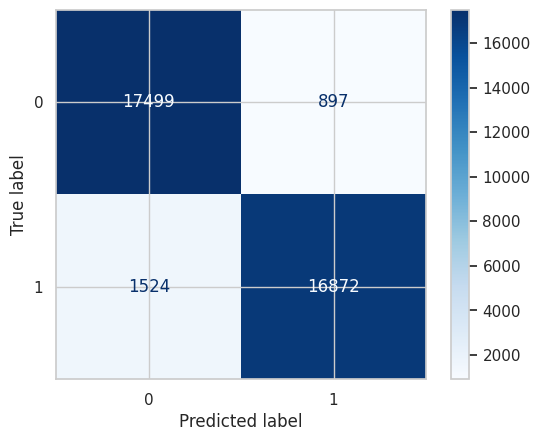

In [ ]:
y_train_pred = grid_search_xgb.best_estimator_.predict(X_train_sm)
print("GB Training Classification Report:")
print(classification_report(y_train_sm, y_train_pred))

# Print and display confusion matrix
cm = confusion_matrix(y_train_sm, y_train_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search_xgb.best_estimator_.classes_)
disp.plot(cmap='Blues')

GB Testing Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      4600
           1       0.49      0.45      0.47      1321

    accuracy                           0.77      5921
   macro avg       0.67      0.66      0.66      5921
weighted avg       0.77      0.77      0.77      5921



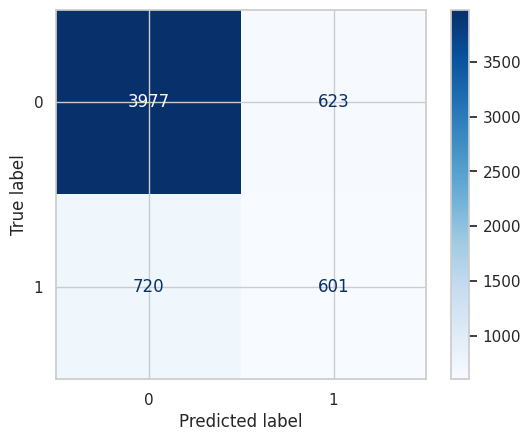

In [ ]:
y_test_pred = grid_search_xgb.best_estimator_.predict(X_test)

print("GB Testing Classification Report:")
print(classification_report(y_test, y_test_pred))

# Print and display confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search_xgb.best_estimator_.classes_)
disp.plot(cmap='Blues')

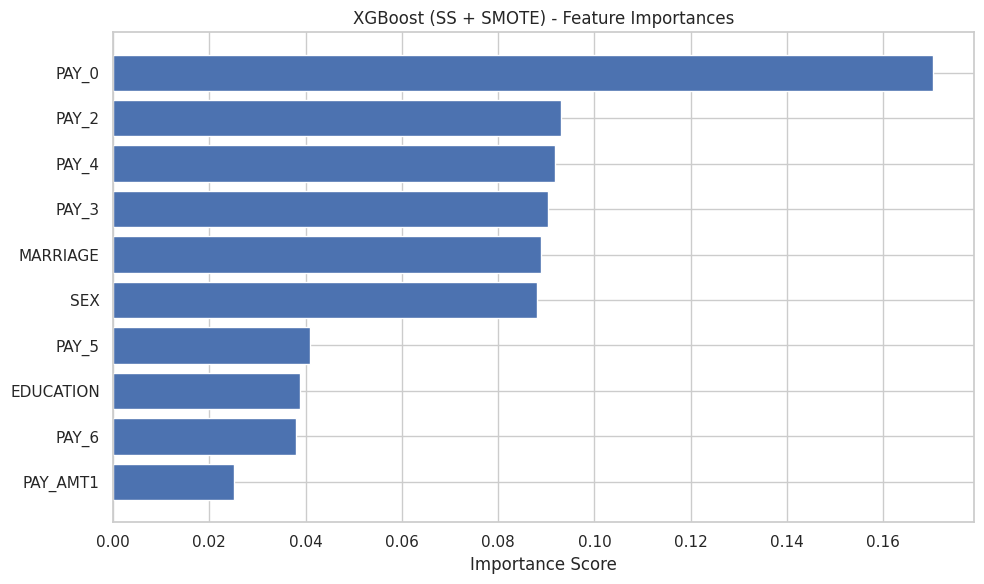

In [ ]:
plot_feature_importances(
    model=grid_search_xgb.best_estimator_,
    feature_names=X_train_sm.columns,
    title="XGBoost (SS + SMOTE) - Feature Importances"
)

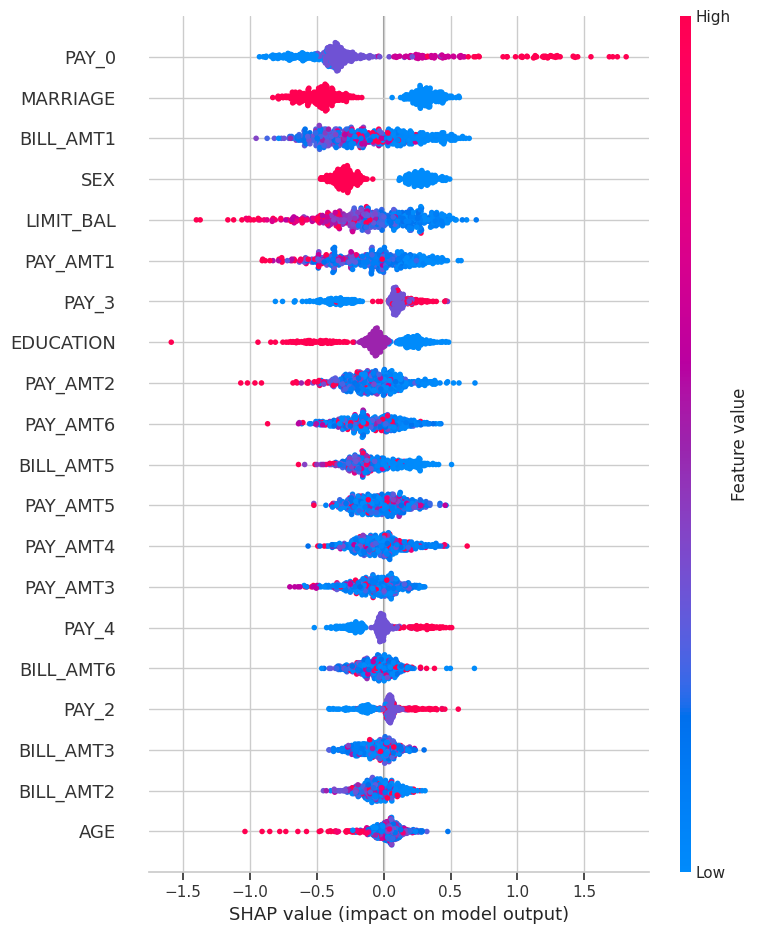

In [ ]:
X_test_df = pd.DataFrame(X_test, columns=X_train_sm.columns)
explainer = shap.Explainer(grid_search_xgb.best_estimator_)

sample_idx = X_test_df.sample(n=500, random_state=42)
shap_values_sample = explainer.shap_values(sample_idx)

# Summary plot for XGBoost
shap.summary_plot(shap_values_sample, sample_idx)

In [ ]:
# Save the best model
joblib.dump(grid_search_rf.best_estimator_, 'xgb_best_model_2.pkl')

['xgb_best_model_2.pkl']

#### Stratified Sampling + SMOTE + PCA

In [ ]:
xgb = XGBClassifier(
    objective='binary:logistic',   # optimize log-loss internally
    eval_metric='auc',             # measure performance by class-separation quality
    # tree_method='gpu_hist',        # Enable GPU
    use_label_encoder=False,
    random_state=23
)

grid_search_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid_xgb,
    cv=5,
    scoring='f1',
    verbose=2,
    n_jobs=-1
)

grid_search_xgb.fit(X_train_pca, y_train_sm)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:46:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='auc', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=23, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 300],
                         'reg_alpha': [0, 0.1, 1], 'reg_lambda': [1, 5, 10],
                         'subsample': [0.6, 0.8]},
             scoring='f1', verbose=2)

GB Training Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93     18396
           1       0.94      0.91      0.93     18396

    accuracy                           0.93     36792
   macro avg       0.93      0.93      0.93     36792
weighted avg       0.93      0.93      0.93     36792



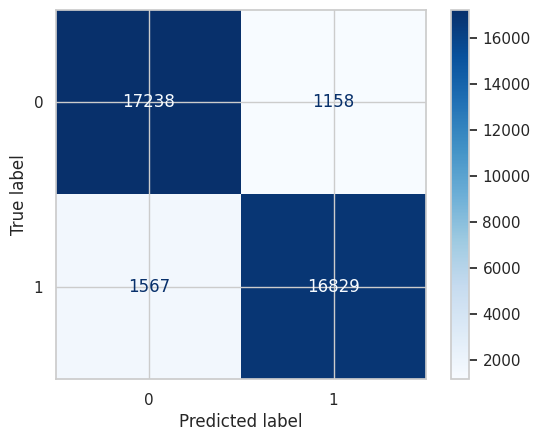

In [ ]:
y_train_pred = grid_search_xgb.best_estimator_.predict(X_train_pca)
print("GB Training Classification Report:")
print(classification_report(y_train_sm, y_train_pred))

# Print and display confusion matrix
cm = confusion_matrix(y_train_sm, y_train_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search_xgb.best_estimator_.classes_)
disp.plot(cmap='Blues')

GB Testing Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.80      0.83      4600
           1       0.43      0.52      0.47      1321

    accuracy                           0.74      5921
   macro avg       0.64      0.66      0.65      5921
weighted avg       0.76      0.74      0.75      5921



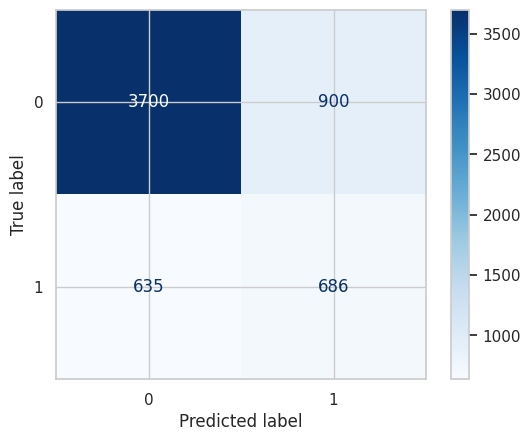

In [ ]:
y_test_pred = grid_search_xgb.best_estimator_.predict(X_test_pca)

print("GB Testing Classification Report:")
print(classification_report(y_test, y_test_pred))

# Print and display confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search_xgb.best_estimator_.classes_)
disp.plot(cmap='Blues')

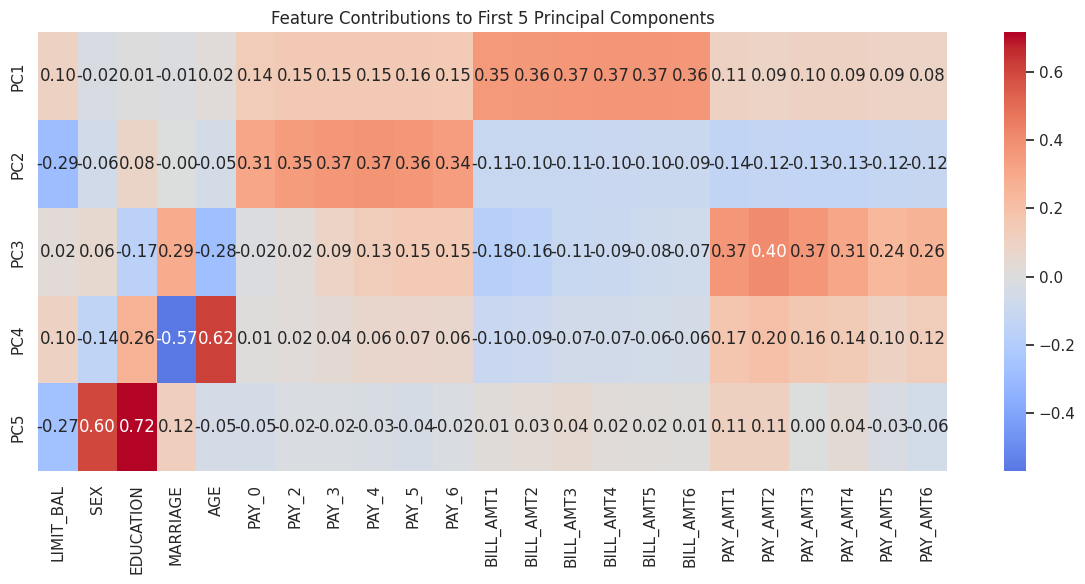

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assume X_train.columns is available
pca_components = pd.DataFrame(
    pca.components_,
    columns=X_train.columns,
    index=[f'PC{i+1}' for i in range(pca.n_components_)]
)

# Plot heatmap of first N principal components
plt.figure(figsize=(12, 6))
sns.heatmap(pca_components.head(5), cmap='coolwarm', center=0, annot=True, fmt=".2f")
plt.title("Feature Contributions to First 5 Principal Components")
plt.tight_layout()
plt.show()


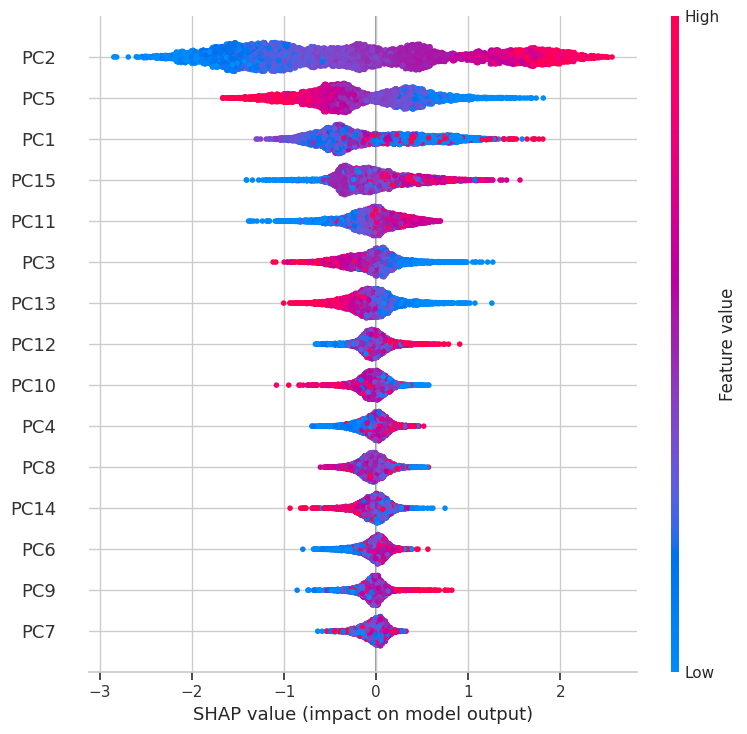

In [ ]:
# Create DataFrame for naming PCs
pc_feature_names = [f'PC{i+1}' for i in range(X_train_pca.shape[1])]
X_test_pca_df = pd.DataFrame(X_test_pca, columns=pc_feature_names)

# SHAP for PCA model
explainer = shap.Explainer(grid_search_xgb.best_estimator_)
shap_values = explainer(X_test_pca_df)

# Plot
shap.summary_plot(shap_values, X_test_pca_df)

In [ ]:
# Save the best model
joblib.dump(grid_search_rf.best_estimator_, 'xgb_best_model_3.pkl')

['xgb_best_model_3.pkl']

#### Evaluation

In [4]:
import pandas as pd

# Create a dictionary with your data
data = {
    'Method': [
        'SS',
        'SS + SMOTE',
        'SS + SMOTE + PCA'
    ],
    'Training Accuracy': [0.79, 0.93, 0.93],
    'Test Accuracy': [0.77, 0.77, 0.74],
    'Class 0 F1 (Test)': [0.85, 0.86, 0.83],
    'Class 1 F1 (Test)': [0.54, 0.47, 0.47],
    'Macro F1 (Test)': [0.70, 0.66, 0.65]
}

# Create DataFrame
print(pd.DataFrame(data))


             Method  Training Accuracy  Test Accuracy  Class 0 F1 (Test)  \
0                SS               0.79           0.77               0.85   
1        SS + SMOTE               0.93           0.77               0.86   
2  SS + SMOTE + PCA               0.93           0.74               0.83   

   Class 1 F1 (Test)  Macro F1 (Test)  
0               0.54             0.70  
1               0.47             0.66  
2               0.47             0.65  


**Level 1**

The Gradient Boosting model achieves an accuracy of 79% on training and 77% on testing, indicating good generalization with a slight drop — a typical and acceptable tradeoff.

However, both the training and testing classification reports reveal much stronger performance on class 0 than class 1. On the test set, class 1 has a precision of 0.49 and recall of 0.60, suggesting that while some positive samples are detected, many are still missed.

The feature importance plot shows that PAY_0 is by far the most influential feature with an importance score of 0.38, much higher than all others. This indicates the model is heavily reliant on one credit repayment history feature, and such strong dependence on a single variable can lead to poor generalization, especially if that feature is unstable or non-causal.

**Level 2**

SMOTE dramatically improves training performance, pushing precision, recall, and F1-scores to ~93–95% for both classes — indicating the model can perfectly separate the synthetic samples during training.

On the test set, however, class 1 performance declines slightly compared to Level 1. F1-score for class 1 is 0.47, lower than before. This reveals clear overfitting to synthetic class 1 data, which doesn’t generalize to real-world minority samples.

The feature importance plot still shows PAY_0 as the most important, but with a reduced importance score of 0.17, and other PAY_X features sharing influence (around 0.09 each). This means the model is beginning to distribute attention more broadly, but the synthetic balance hasn't helped test generalization.

**Level 3**

PCA maintains strong training performance (~93% accuracy), but test performance drops further, especially for class 1 (F1 = 0.47). The test accuracy declines to 74%, indicating that the dimensionality reduction step may have caused the model to lose key signal from informative minority class features.

The use of PCA does not reduce overfitting — and may even worsen it by compressing features in a way that diminishes the signal for class 1. Though the model still learns effectively in training, it becomes less sensitive to real-world minority class data.

Based on SHAP analysis, the most influential principal component is PC2, which is primarily composed of the PAY_X features. This means that even in reduced dimensions, the model still focuses heavily on credit repayment history — now transformed into principal components. SHAP provides a more interpretable mapping from transformed features (PCs) back to the original ones, offering better transparency on what the model is really using for predictions.

## Conclusion

At Level 1 (Stratified Sampling only), both Random Forest and Gradient Boosting provide comparable baseline performance. RF achieves slightly higher training (82%) and testing (78%) accuracy than GB (79% and 77%, respectively), with both models scoring an identical F1 score of 0.54 on the minority class (class 1) in the test set. However, RF shows a more balanced reliance on features, with PAY_0 having an importance score of 0.23, while GB depends more heavily on this same feature, assigning it a much higher importance of 0.38. This suggests that GB might be more vulnerable to overfitting specific dominant features early in the modeling process, while RF distributes learning more evenly. Both models still struggle with recall and precision for class 1, indicating the need for resampling strategies to improve minority class performance.

Moving into Level 2 (Stratified Sampling + SMOTE), the differences between the models become more apparent. RF overfits drastically, achieving near-perfect training metrics across all evaluation measures (99% accuracy, precision, recall, and F1). However, test performance remains mostly unchanged, with a class 1 F1 score of 0.50 — essentially no gain in generalization despite synthetic balancing. Interestingly, RF reduces its reliance on PAY_0 (importance drops to 0.09), indicating that SMOTE introduced diversity in the feature importance profile, even if it didn’t improve class 1 detection. On the other hand, GB shows a less extreme reaction to SMOTE. Training performance increases to 93% accuracy, but its class 1 F1 score on the test set drops slightly to 0.47. GB maintains a stronger dependence on PAY_0 (importance = 0.17), suggesting it's less responsive to the synthetic data and possibly still constrained by dominant original features. Overall, both models overfit to the SMOTE-augmented data, but RF appears to adapt more in terms of feature use, while GB retains stronger structural bias.

At Level 3 (Stratified Sampling + SMOTE + PCA), both models continue to overfit the training data, maintaining high training performance (99% for RF and 93% for GB), but test set performance drops further. RF’s class 1 F1 score decreases slightly to 0.49, while GB falls to 0.47. PCA seems to introduce underfitting, particularly in the test set, possibly due to the loss of minority-class-specific information during dimensionality reduction. SHAP analysis for both models reveals that PC2 — the second principal component — is the most influential in predictions, and it's largely composed of the PAY_X features. This reflects that, even after transformation, both models continue to rely on payment history as the main signal, though this may no longer be sufficient for distinguishing class 1 in the reduced feature space. RF still holds a marginal edge in class 1 generalization and training-test consistency.

In conclusion, Random Forest exhibits slightly better generalization across all levels, with more balanced feature usage and marginally stronger performance on class 1, especially when faced with resampling and dimensionality reduction. Gradient Boosting, while competitive, tends to over-rely on specific features like PAY_0, and although it avoids extreme overfitting, it underperforms on class 1 generalization throughout. Neither model benefits significantly from SMOTE or PCA alone, which indicates that more sophisticated techniques or algorithms might be necessary to improve minority class performance.

## Acknowledgements
Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

Gradient Boosting for Interpretable Risk Assessment in Finance (Kori & Hugar, 2021).

["Machine learning algorithms for predicting default of Credit Card clients" by MatteoM95](https://github.com/MatteoM95/Default-of-Credit-Card-Clients-Dataset-Analisys?tab=readme-ov-file#machine-learning-algorithms-for-predicting-default-of-credit-card-clients-)